In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pprint
import missingno as msno

In [2]:
from lifelines import KaplanMeierFitter

In [3]:
import altair as alt

In [2]:
def open_table_list_columns(table):
    table = pd.read_csv('/volumes/ellieking/Checked/'+table+'.csv', dtype=object)
    pp = pprint.PrettyPrinter()
    pp.pprint(list(table.columns))
    return table

### client table

In [3]:
client = open_table_list_columns('Client')

['Serial',
 'CurrentEpisode',
 'Status',
 'Service',
 'ProjectCode',
 'Gender',
 'Nationality',
 'RelationshipStatus',
 'Ethnic_Origin',
 'Religion',
 'Sexuality',
 'NoFixedAbode',
 'Scrip_Index',
 'Alert',
 'CurrentKeyworker',
 'CaseNumber',
 'Office']


In [4]:
print("There are {} rows in client and {} unique clients (Serial).\nTherefore is {} that rows uniquely identify clients".format(client.shape[0], client.Serial.nunique(), (client.shape[0]==client.Serial.nunique())))

There are 191017 rows in client and 191017 unique clients (Serial).
Therefore is True that rows uniquely identify clients


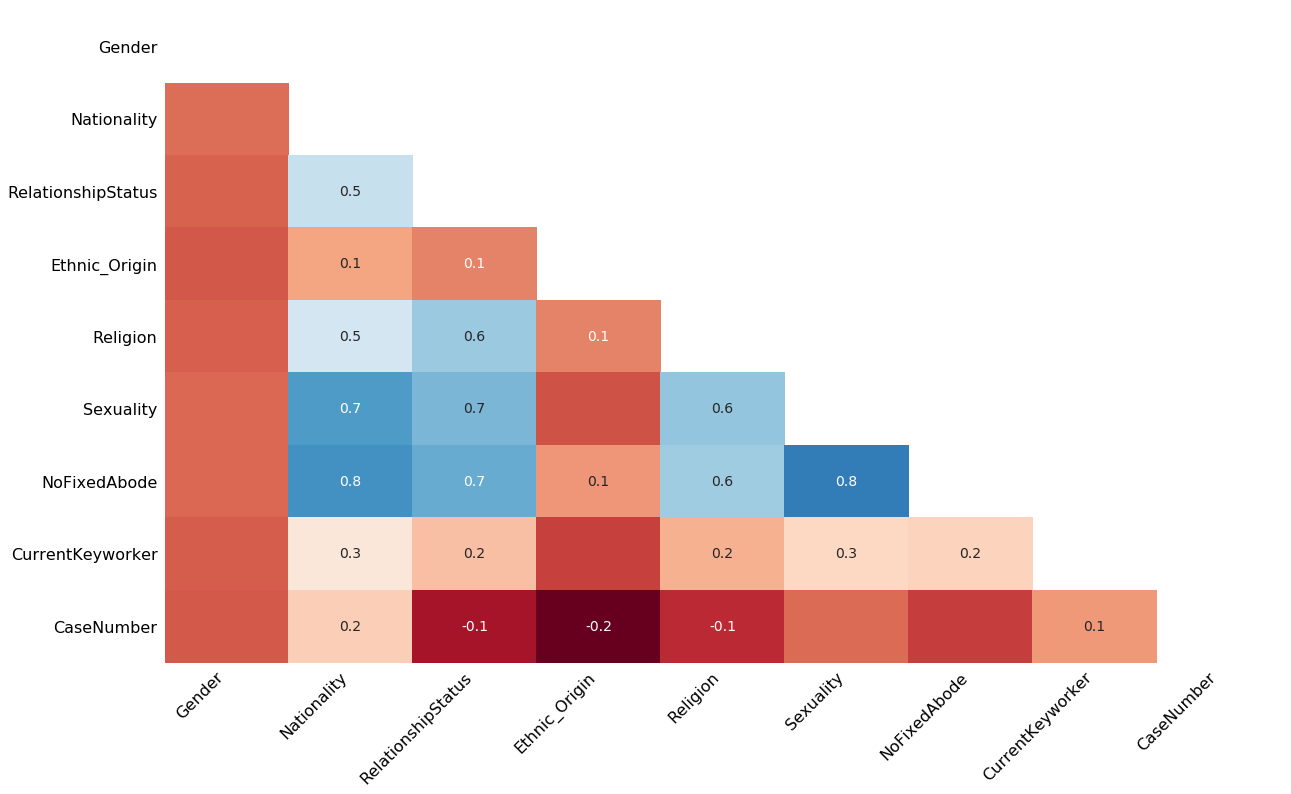

In [5]:
msno.heatmap(client)

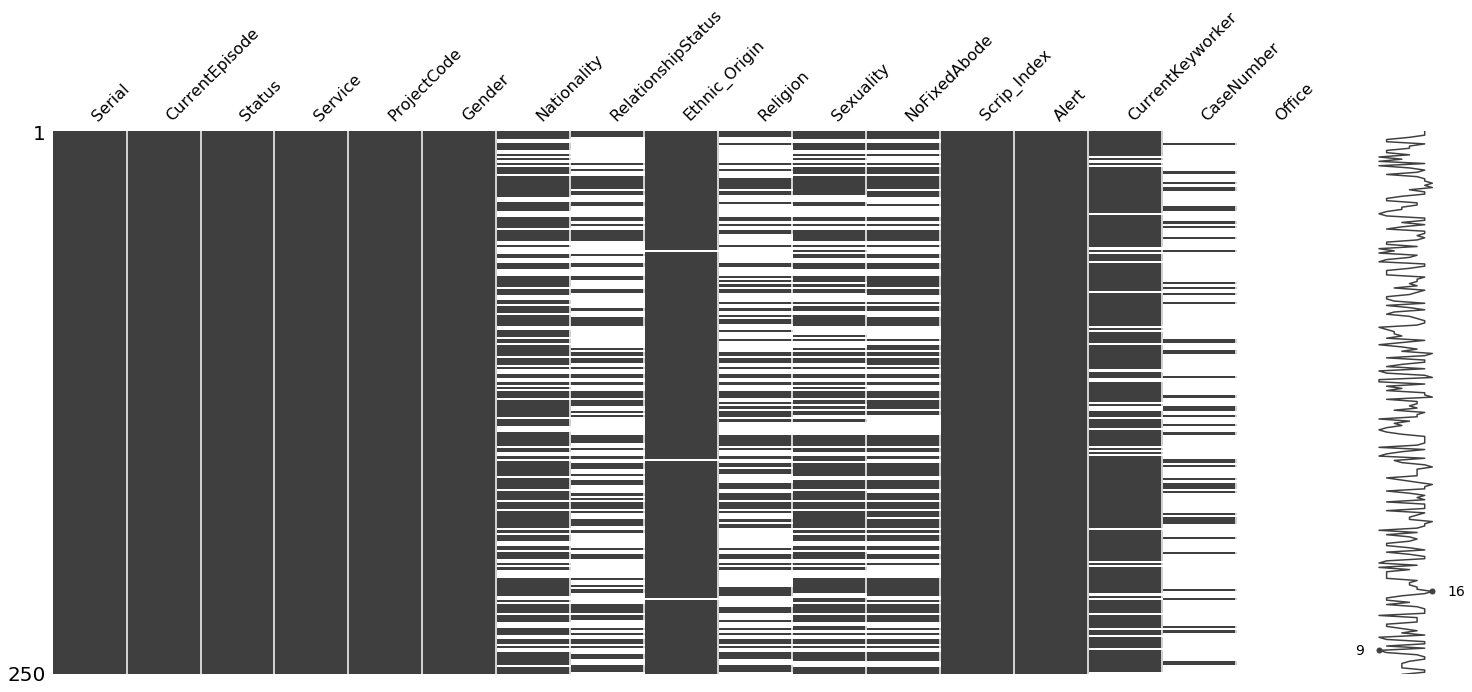

In [6]:
msno.matrix(client.sample(250))

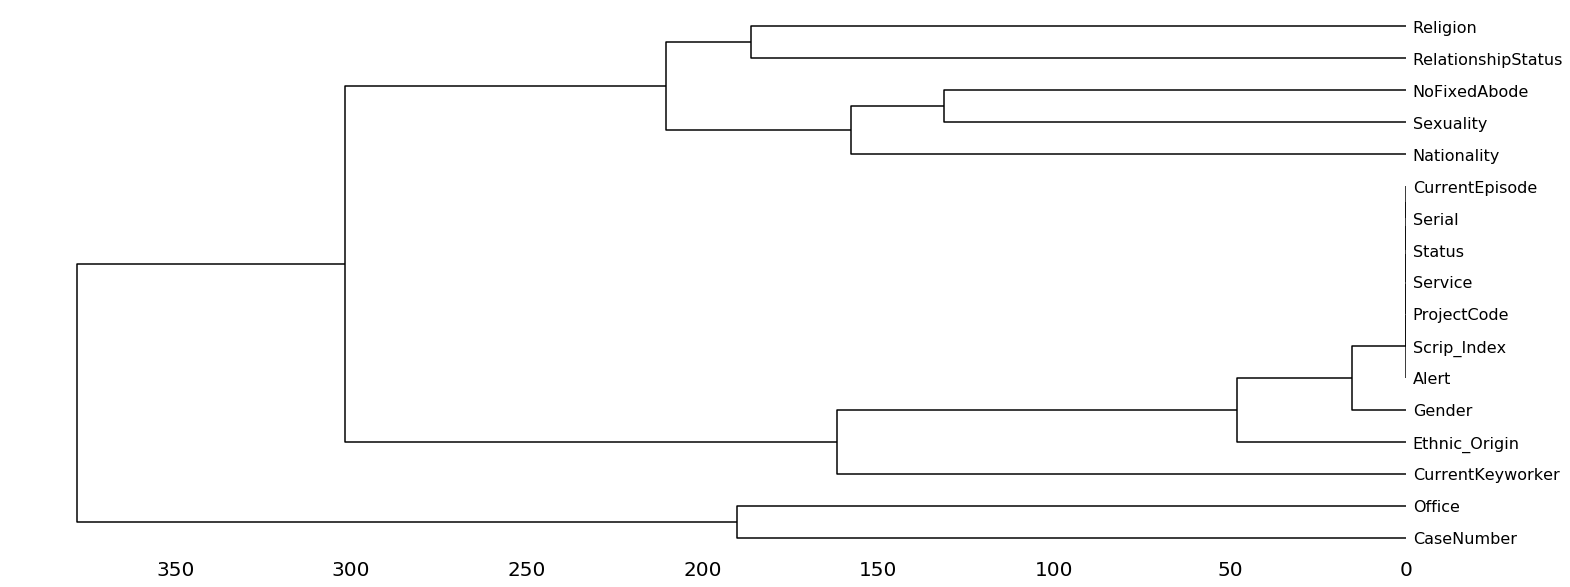

In [7]:
msno.dendrogram(client, orientation='left')

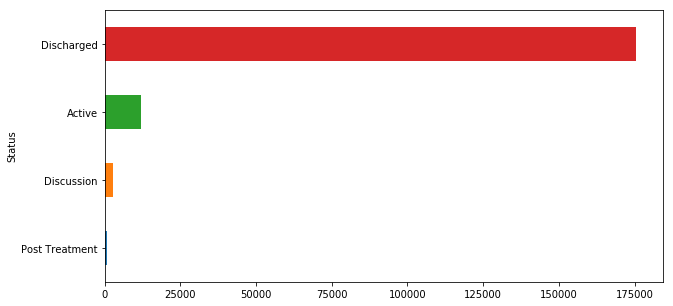

In [8]:
client.groupby('Status').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

In [9]:
print("There are {} services in Addaction".format(len(client.groupby('Service'))))

There are 115 services in Addaction


In [10]:
print("There are {} project codes in Addaction".format(len(client.groupby('ProjectCode'))))

There are 115 project codes in Addaction


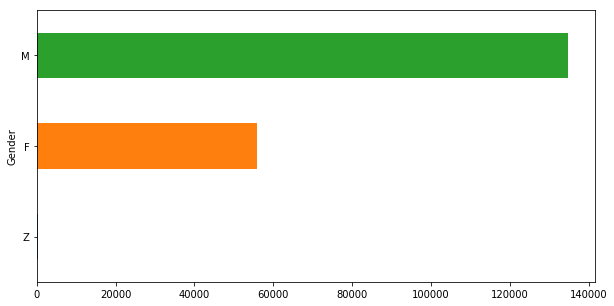

In [11]:
client.groupby('Gender').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

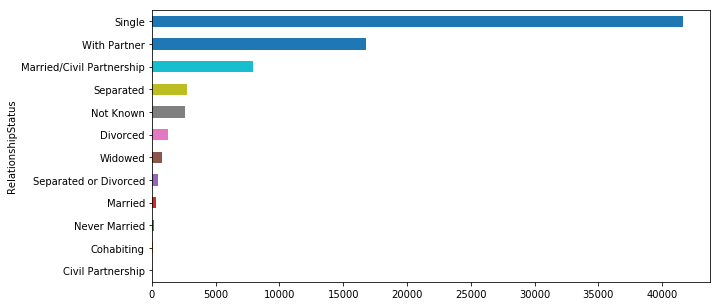

In [12]:
client.groupby('RelationshipStatus').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

Are these categoires mutually exclusive?

In [13]:
client.groupby('RelationshipStatus').size().sum()

74847

In [14]:
print("There are {} clients with more than 1 relationship status".format(sum(client.groupby(['Serial','RelationshipStatus']).size().groupby(level='Serial').sum()>1)))

There are 0 clients with more than 1 relationship status


These could be collapsed for modelling. What about?:
- Married/Civil Partnership + Married + Civil Partnership + Cohabiting + With Partner
- Single + Separated + Divorced + Widowed + Separated or Divorced + Never Married
- Not known + missing

ONS uses: 
Marital status indicates whether a person is legally married or not. This publication uses five categories of legal marital status: 
- single, never married or civil partnered

- married, including separated (this category includes those in both opposite-sex and same-sex marriages)

- civil partnered, including separated

- divorced, including legally dissolved civil partners

- widowed, including surviving civil partners

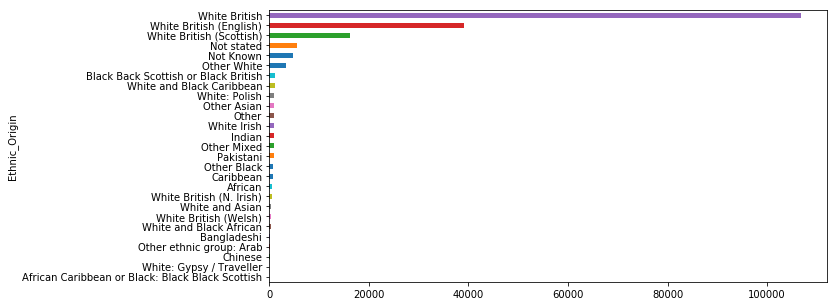

In [15]:
client.groupby('Ethnic_Origin').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

These need to be collapsed. How about:

- White British + White British (English) + White British (Scottish) + Other White + White: Polish + White irish + White British (N.Irish) + White British (Welsh) + White: Gypsy / Traveller
- Other black + Caribbean + African + Black Back Scottish or Black British + African Carribean or Black: Black Black Scottish
- White & Black Caribbean + White & Black Afircan + Other mixed + White and Asian
- Other Asian + Indian + Pakistani + Bangladeshi + Chinese
- Other + Other ethnic group: Arab


ONS uses different for England/Wales/Scotland/NI. Here's England: 
What is your ethnic group?

Choose one option that best describes your ethnic group or background

White

1. English/Welsh/Scottish/Northern Irish/British
2. Irish
3. Gypsy or Irish Traveller
4. Any other White background, please describe

Mixed/Multiple ethnic groups

5. White and Black Caribbean
6. White and Black African
7. White and Asian
8. Any other Mixed/Multiple ethnic background, please describe

Asian/Asian British

9. Indian
10. Pakistani
11. Bangladeshi
12. Chinese
13. Any other Asian background, please describe

Black/ African/Caribbean/Black British

14. African
15. Caribbean
16. Any other Black/African/Caribbean background, please describe

Other ethnic group

17. Arab
18. Any other ethnic group, please describe

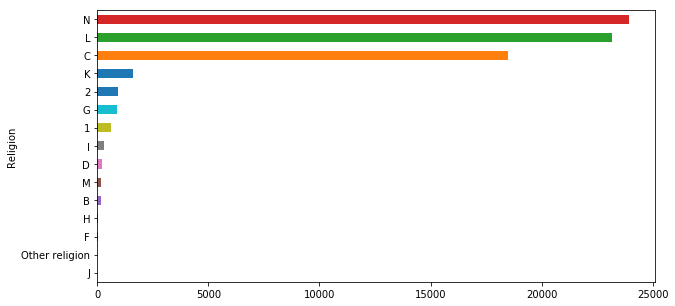

In [16]:
client.groupby('Religion').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

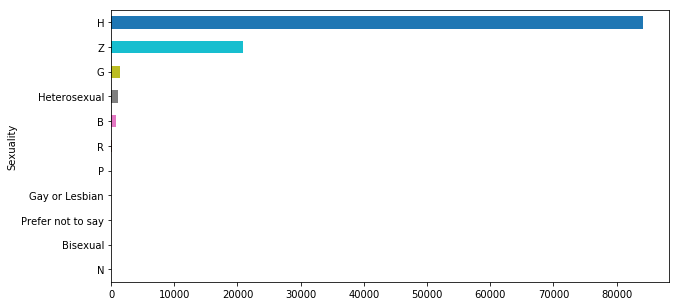

In [17]:
client.groupby('Sexuality').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

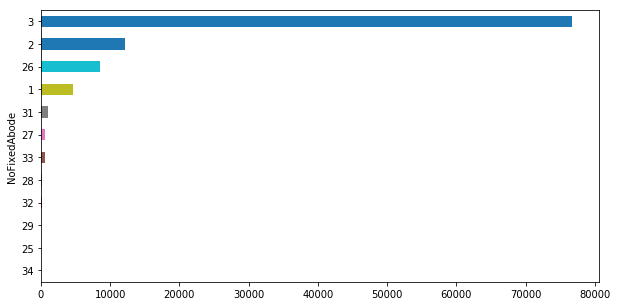

In [18]:
client.groupby('NoFixedAbode').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

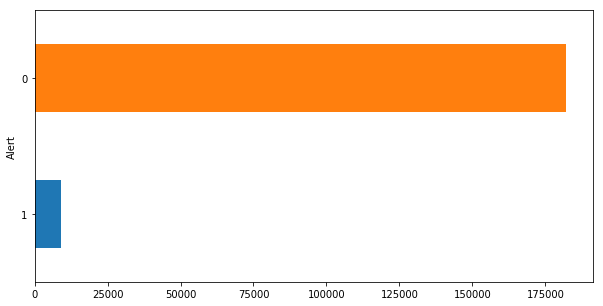

In [19]:
client.groupby('Alert').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

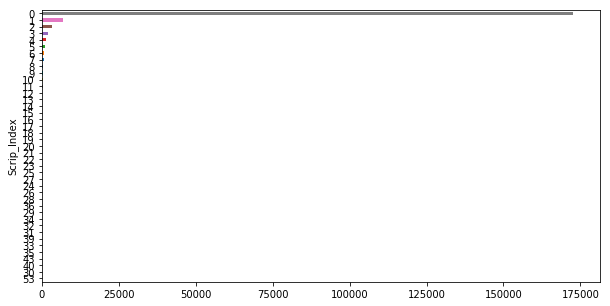

In [20]:
client.groupby('Scrip_Index').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

In [21]:
client.CaseNumber.nunique()

28533

## Discharge

In [22]:
discharge = open_table_list_columns('Discharge')

['DischargeID',
 'Serial',
 'Episode',
 'EventID',
 'DischargeDate',
 'DateStarted',
 'LetterToGP',
 'LetterToClient',
 'ModalityStatusCode',
 'ReasonForClosure',
 'Agency',
 'YPSelfHarmExit',
 'YPUnsafeDrugExit',
 'YPOffendingExit',
 'YPCAFExit',
 'YPSaferSexExit',
 'YPSexualHealthExit',
 'YPRegisteredGPExit',
 'YPGoalsExit',
 'DischargeDestination',
 'YPLeadProfessionalExit',
 'YPMHServicesExit',
 'YPYOTExit',
 'YPSexualExploitationExit',
 'YPContactLearningDifficultyTreatExit',
 'YPSexuallyActiveTreatExit',
 'EngagedInUnsafeSexAtTrtmntEnd',
 'YPFreqOfUseOfDrug1AtTrtmntExit',
 'ChildProtectionIssues',
 'PlannedDateOfRecordRemoval',
 'NDTMSDischargeDate',
 'NDTMSReasonForClosure',
 'NDTMSDischargeEventID',
 'PrisonExitReason',
 'PrisonExitDestination',
 'ReferredTo',
 'PreReleaseReviewDate',
 'YPOfferedSupportFromOtherServices',
 'DateOfDeath',
 'AUDITScore',
 'ImmunisationsAdministered',
 'CounsellingDelivered',
 'ClientCommittedSuicide',
 'MentalHealthProblem',
 'CareStatusAtTreatme

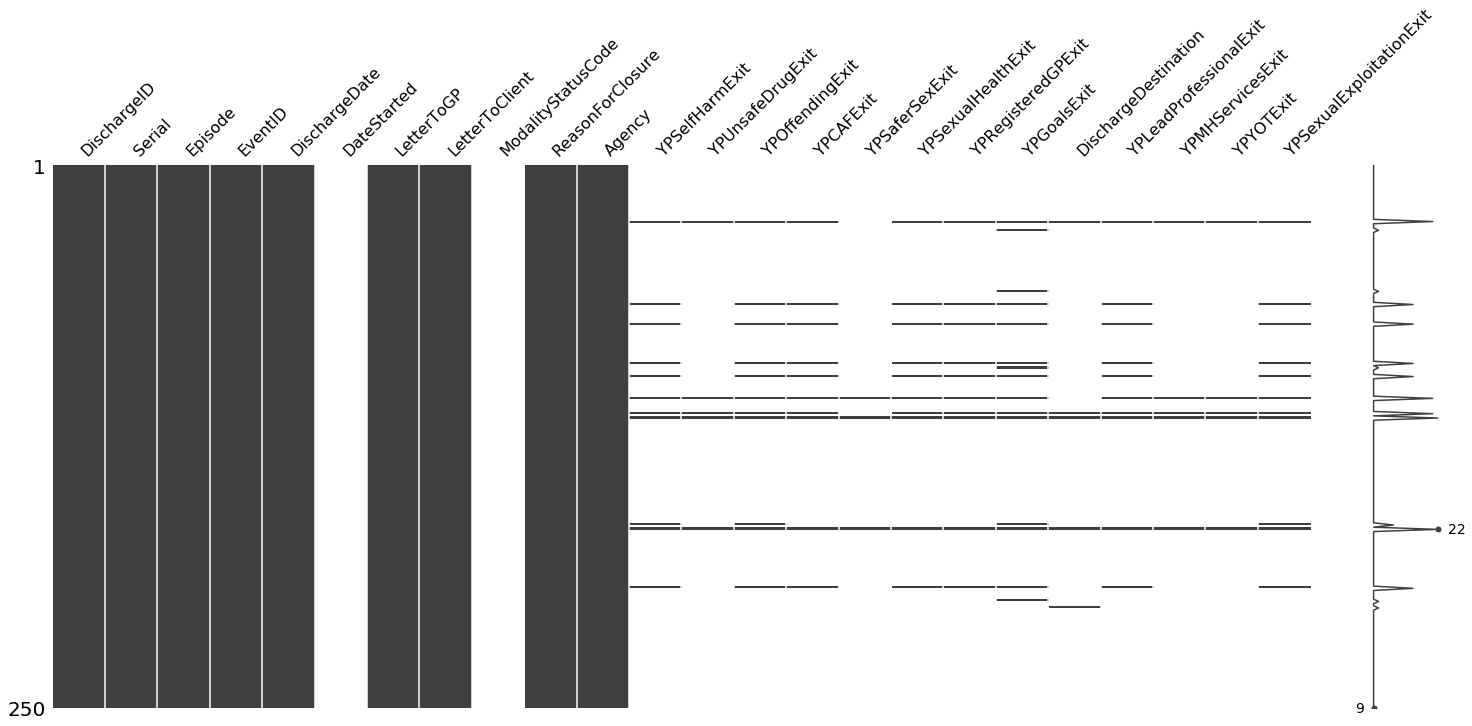

In [23]:
msno.matrix(discharge[['DischargeID',
 'Serial',
 'Episode',
 'EventID',
 'DischargeDate',
 'DateStarted',
 'LetterToGP',
 'LetterToClient',
 'ModalityStatusCode',
 'ReasonForClosure',
 'Agency',
 'YPSelfHarmExit',
 'YPUnsafeDrugExit',
 'YPOffendingExit',
 'YPCAFExit',
 'YPSaferSexExit',
 'YPSexualHealthExit',
 'YPRegisteredGPExit',
 'YPGoalsExit',
 'DischargeDestination',
 'YPLeadProfessionalExit',
 'YPMHServicesExit',
 'YPYOTExit',
 'YPSexualExploitationExit']].sample(250))

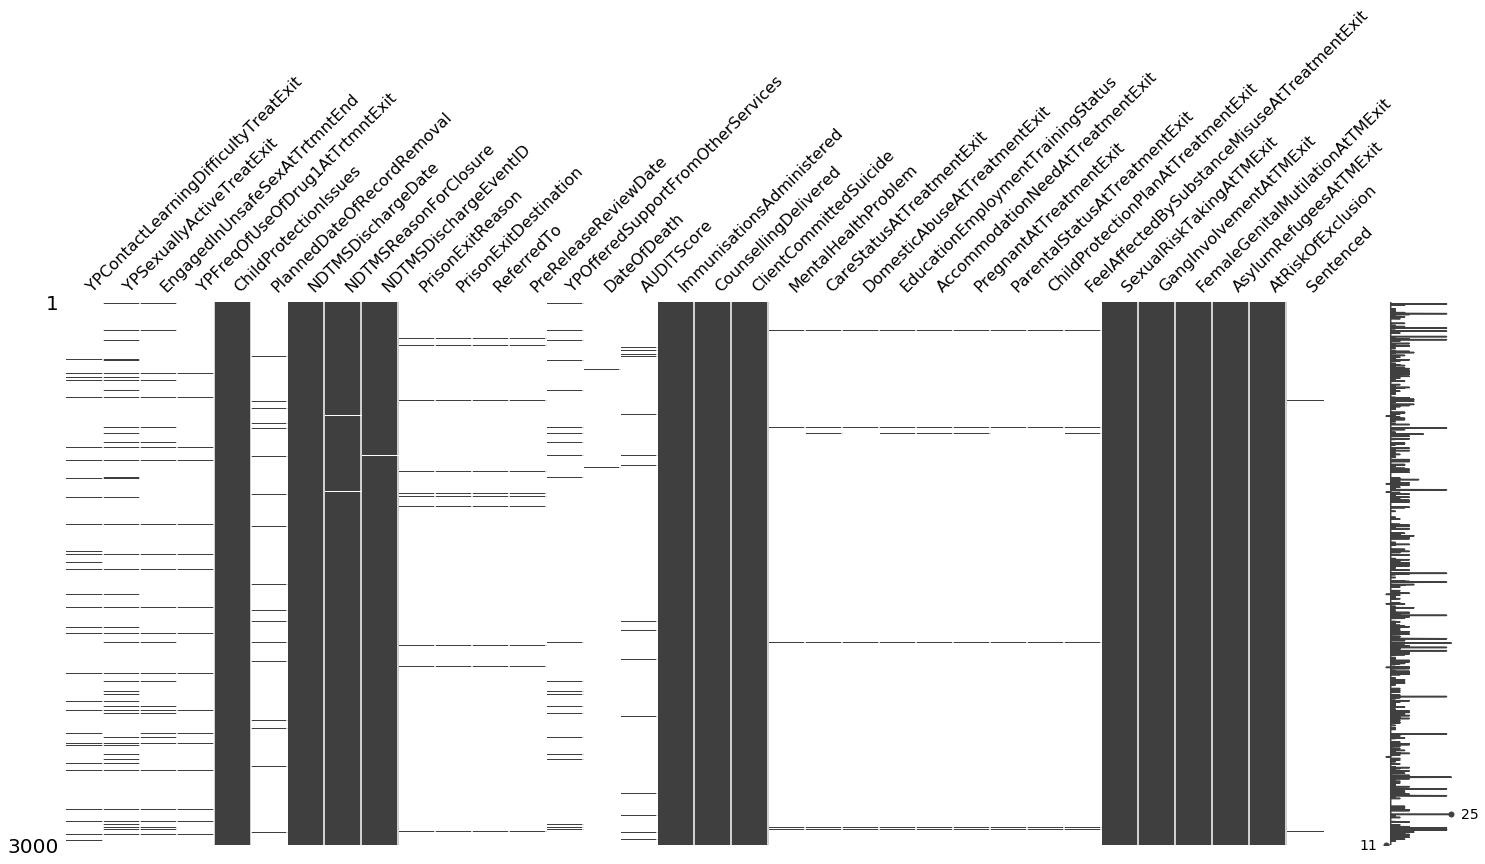

In [24]:
msno.matrix(discharge[['YPContactLearningDifficultyTreatExit',
 'YPSexuallyActiveTreatExit',
 'EngagedInUnsafeSexAtTrtmntEnd',
 'YPFreqOfUseOfDrug1AtTrtmntExit',
 'ChildProtectionIssues',
 'PlannedDateOfRecordRemoval',
 'NDTMSDischargeDate',
 'NDTMSReasonForClosure',
 'NDTMSDischargeEventID',
 'PrisonExitReason',
 'PrisonExitDestination',
 'ReferredTo',
 'PreReleaseReviewDate',
 'YPOfferedSupportFromOtherServices',
 'DateOfDeath',
 'AUDITScore',
 'ImmunisationsAdministered',
 'CounsellingDelivered',
 'ClientCommittedSuicide',
 'MentalHealthProblem',
 'CareStatusAtTreatmentExit',
 'DomesticAbuseAtTreatmentExit',
 'EducationEmploymentTrainingStatus',
 'AccommodationNeedAtTreatmentExit',
 'PregnantAtTreatmentExit',
 'ParentalStatusAtTreatmentExit',
 'ChildProtectionPlanAtTreatmentExit',
 'FeelAffectedBySubstanceMisuseAtTreatmentExit',
 'SexualRiskTakingAtTMExit',
 'GangInvolvementAtTMExit',
 'FemaleGenitalMutilationAtTMExit',
 'AsylumRefugeesAtTMExit',
 'AtRiskOfExclusion',
 'Sentenced']].sample(3000))

In [25]:
print("There are {} rows in discharge and {} unique clients (Serial).\nTherefore is {} that rows uniquely identify clients".format(discharge.shape[0], discharge.Serial.nunique(), (discharge.shape[0]==discharge.Serial.nunique())))
print("On average there are {} discharges per client".format(discharge.shape[0]/discharge.Serial.nunique()))

There are 271462 rows in discharge and 181346 unique clients (Serial).
Therefore is False that rows uniquely identify clients
On average there are 1.4969285233752054 discharges per client


Should these missings be recoded to zero?

In [26]:
discharge['YPContactLearningDifficultyTreatExit'].value_counts(dropna=False)

NaN    262395
2        6369
98       2492
1         206
Name: YPContactLearningDifficultyTreatExit, dtype: int64

In [27]:
discharge['DomesticAbuseAtTreatmentExit'].value_counts(dropna=False)

NaN    269071
No       2175
Yes       216
Name: DomesticAbuseAtTreatmentExit, dtype: int64

In [28]:
discharge['EducationEmploymentTrainingStatus'].value_counts(dropna=False)

NaN                                   268991
Mainstream Education                    1168
Alternative Education                    472
Not in employment or education           257
regular employment                       153
education or training (NEET)             145
Apprenticeship or Training               127
not in employment                         87
Persistent absentee                       14
economically inactive health issue        11
client declined to answer                 11
voluntary work                            10
Permanetly excluded                        8
Temporarily Excluded                       6
economically inactive caring role          2
Name: EducationEmploymentTrainingStatus, dtype: int64

In [29]:
discharge['ChildProtectionIssues'].value_counts(dropna=False)

0    266950
1      4512
Name: ChildProtectionIssues, dtype: int64

In [30]:
discharge['YPContactLearningDifficultyTreatExit'].shape

(271462,)

In [31]:
discharge_codes_df = pd.read_csv('/Users/ellieking/Downloads/discharge_codes - Sheet1.csv', dtype=object)

In [32]:
discharge_codes = pd.Series(discharge_codes_df.Text.values,index=discharge_codes_df.Code).to_dict()

In [33]:
discharge_codes

{'1': 'Treatment completed drug free',
 '10': 'Other',
 '11': 'Not known',
 '12': 'Treatment declined by client',
 '13': 'Inappropriate referral',
 '14': 'Retained in custody',
 '15': 'Comp drug free ref targeted youth support service',
 '16': 'Comp drug free ref child looked after service',
 '17': 'Comp drug free ref criminal justice service',
 '18': 'Comp drug free ref health or mental health service',
 '19': 'Comp drug free ref adult treatment provider',
 '2': 'DIP only - Care plan/treatment complete // Treatment completed',
 '20': 'Comp drug free ref other adult service',
 '21': 'Comp drug free no agreed lead agency',
 '22': 'Comp ref targeted youth support service',
 '23': 'Comp ref child looked after service',
 '24': 'Comp ref criminal justice service',
 '25': 'Comp ref health or mental health service',
 '26': 'Comp ref adult treatment provider',
 '27': 'Comp ref other adult service',
 '28': 'Comp no agreed lead agency',
 '29': 'Withdrawn ref targeted youth support service',
 '3'

In [34]:
code = ("80","81","82","83","84","85","86","87","88","89","93","94","95","96","97","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","90","91","85","88","82","85","80","84","85","83","89","13","86","87","610","600","601","602","604","605","606","611","612","613","614","615","616","617","618","619","603","607","608","609","622","620","621","623","624","625","98","99") 
outcome = ("S","S","S","N","N","U","U","N","U","U","N","N","N","N","N","S","S","U","U","N","U","N","N","U","U","U","U","U","N","S","S","S","S","S","S","S","S","S","S","S","S","S","S","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","U","N","N","N","N","N","N","N","U","U","U","U","U","U","U","U","U","U","U","U","U","U","S","S","U","U","S","U","S","N","U","N","U","U","U","N","S","N","U","N","N","U","U","U","U","U","U","U","U","U","U","U","U","U","N","S","U","U","U","U","U","N","U")

code_outcomes = dict(zip(code, outcome))

In [35]:
discharge.head()

,DischargeID,Serial,Episode,EventID,DischargeDate,DateStarted,LetterToGP,LetterToClient,ModalityStatusCode,ReasonForClosure,...,PregnantAtTreatmentExit,ParentalStatusAtTreatmentExit,ChildProtectionPlanAtTreatmentExit,FeelAffectedBySubstanceMisuseAtTreatmentExit,SexualRiskTakingAtTMExit,GangInvolvementAtTMExit,FemaleGenitalMutilationAtTMExit,AsylumRefugeesAtTMExit,AtRiskOfExclusion,Sentenced
0,60,1448335,1,906,Aug 24 2009 12:00AM,NaN,0,0,NaN,85,...,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
1,5527,1369062,1,7499,Oct 17 2009 12:00AM,NaN,0,0,NaN,81,...,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
2,1000,568952,1,6814,Sep 25 2009 12:00AM,NaN,0,0,NaN,85,...,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
3,2490,1230120,1,93681,Jan 22 2010 12:00AM,NaN,0,0,NaN,85,...,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN
4,57910,1230120,2,2045823,Mar 8 2011 12:00AM,NaN,0,0,NaN,608,...,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN


In [36]:
discharge['discharge_reason'] = discharge['NDTMSReasonForClosure'].map(discharge_codes).astype('category')

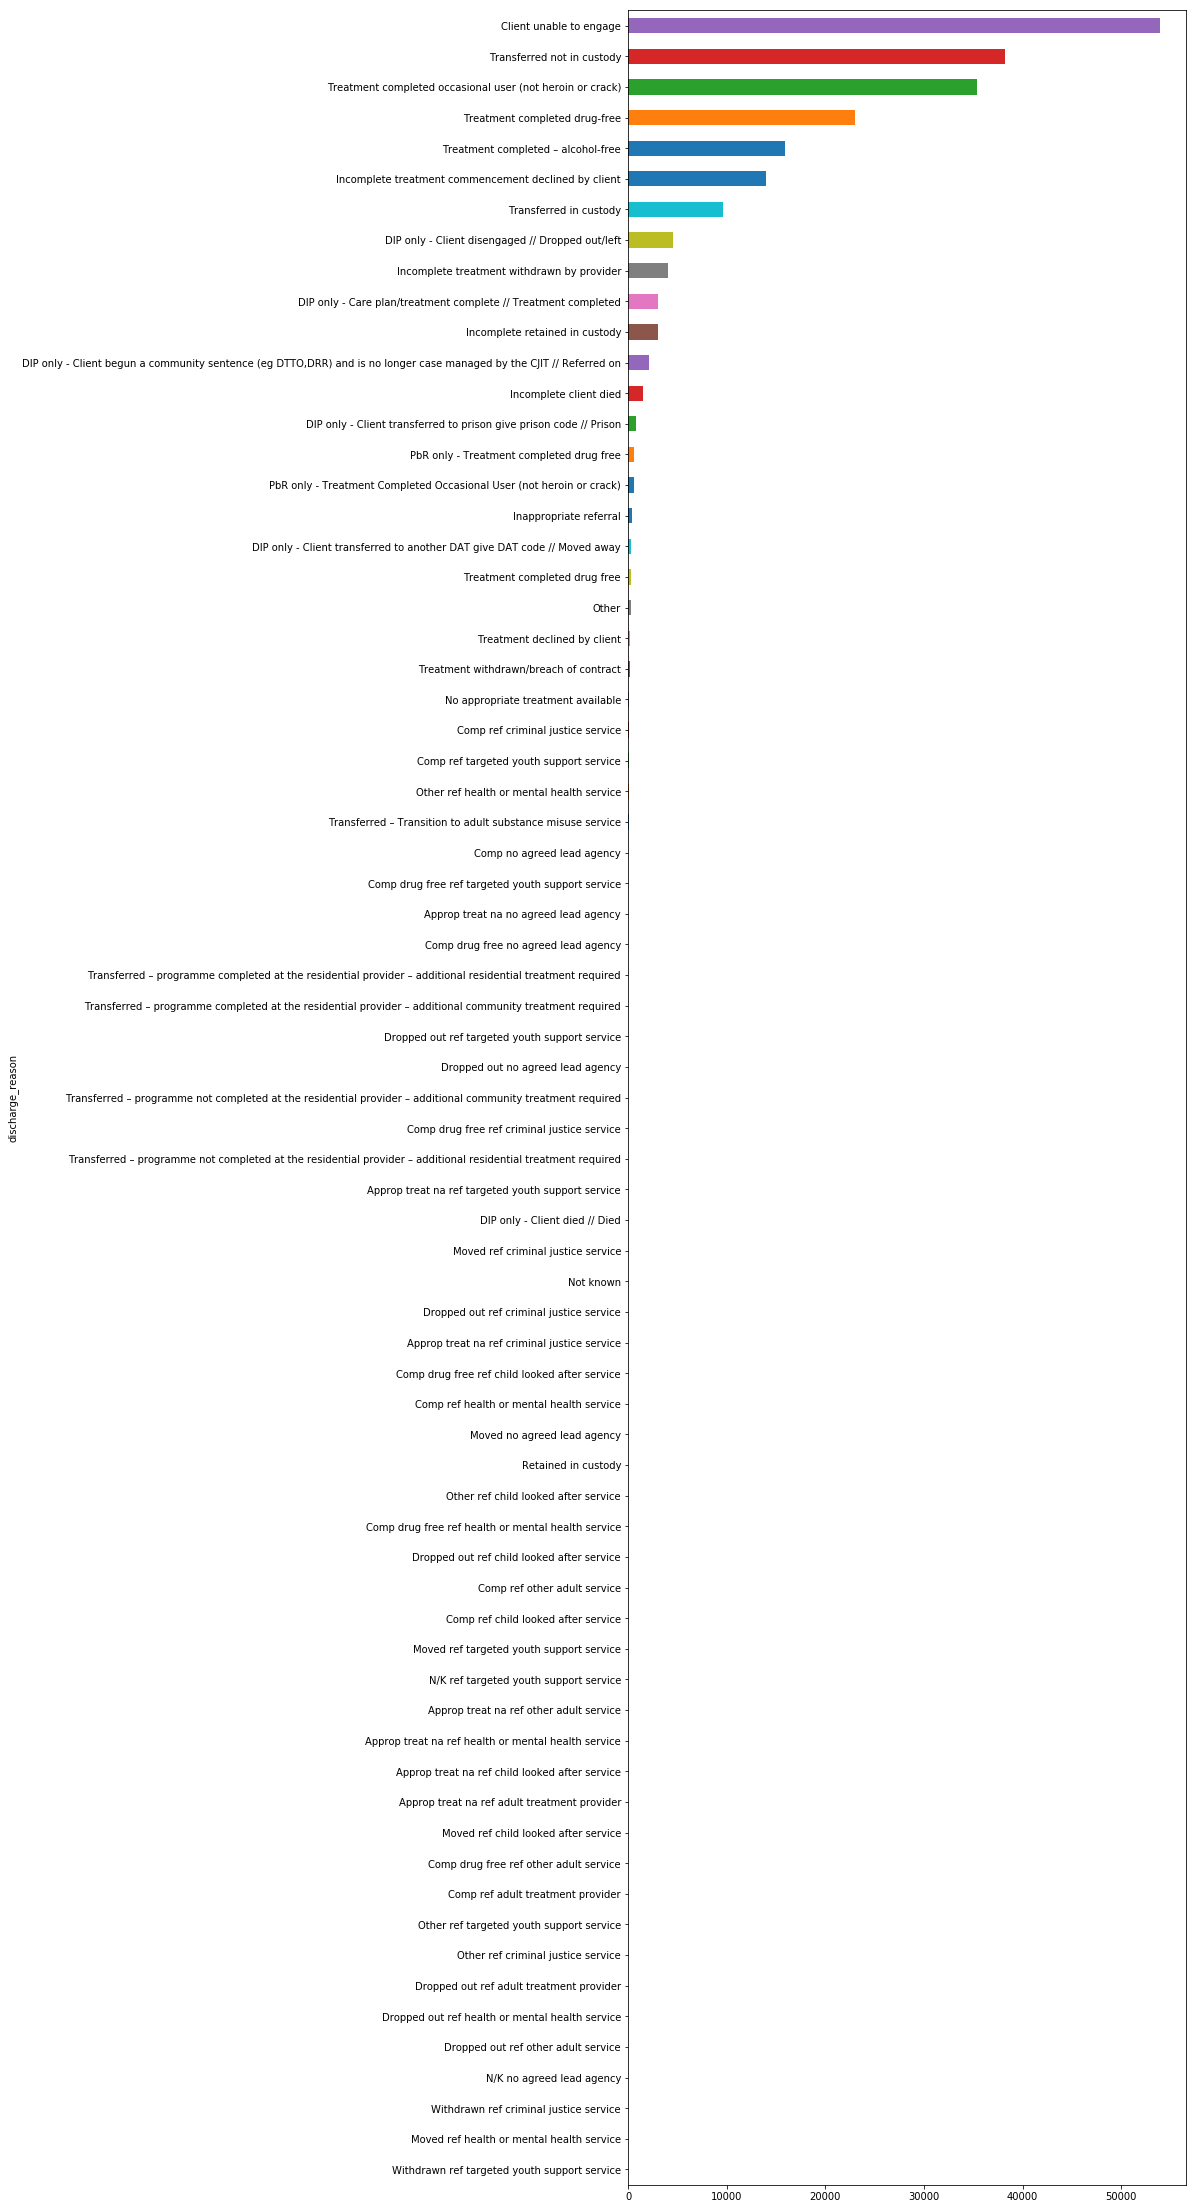

In [37]:
discharge.groupby('discharge_reason').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 40))

In [38]:
print("There are {} episodes with more than 1 discharge code".format(sum(discharge.groupby(['Serial', 'Episode', 'discharge_reason' ]).size().groupby(level=['Serial', 'Episode']).sum()>1)))

There are 0 episodes with more than 1 discharge code


In [39]:
discharge_gr = discharge.groupby('discharge_reason').size().sort_values(ascending=True)
discharge_reason = pd.DataFrame(discharge_gr)
discharge_reason.columns = ['frequency']
discharge_reason['percent'] = discharge_gr / discharge.shape[0]*100
discharge_reason

,frequency,percent
discharge_reason,,
Withdrawn ref targeted youth support service,1,0.000368
Moved ref health or mental health service,1,0.000368
Withdrawn ref criminal justice service,1,0.000368
N/K no agreed lead agency,1,0.000368
Dropped out ref other adult service,1,0.000368
Dropped out ref health or mental health service,1,0.000368
Dropped out ref adult treatment provider,1,0.000368
Other ref criminal justice service,1,0.000368
Other ref targeted youth support service,1,0.000368


In [40]:
discharge['outcome'] = discharge['NDTMSReasonForClosure'].map(code_outcomes).astype('category')

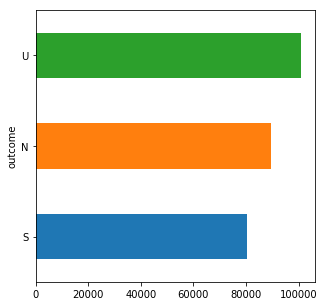

In [41]:
discharge.groupby('outcome').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(5, 5))

In [42]:
outcome_gr = discharge.groupby('outcome').size().sort_values(ascending=True)
outcome = pd.DataFrame(outcome_gr) 
outcome.columns = ['frequency']
outcome['percent_per_episode'] = outcome_gr / discharge.shape[0]*100

outcome

,frequency,percent_per_episode
outcome,,
S,80481,29.647243
N,89536,32.982885
U,101074,37.233204


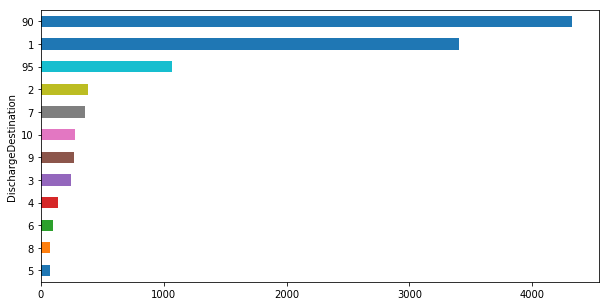

In [43]:
discharge.groupby('DischargeDestination').size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

In [44]:
discharge.groupby('NDTMSReasonForClosure').size().sort_values(ascending=True)

NDTMSReasonForClosure
47         1
26         1
37         1
39         1
40         1
41         1
20         1
46         1
31         1
48         1
51         1
53         1
57         1
59         1
70         1
623        1
29         1
44         2
64         2
50         2
621        2
27         2
23         2
58         3
14         3
56         3
18         3
99         4
25         4
617        5
       ...  
609      304
10       316
1        330
7        332
13       390
91       620
90       632
604      708
8        790
601      876
610      975
89      1510
605     1612
5       2160
602     2947
87      3003
2       3058
86      4076
6       4579
607     7192
600     8481
84      9575
606    11280
88     13960
81     15923
80     22996
608    23164
82     35353
83     38221
85     53879
Length: 99, dtype: int64

In [45]:
discharge.NDTMSReasonForClosure.nunique()

99

In [46]:
discharge.ReasonForClosure.nunique()

99

### need to add episode info to features

In [47]:
episode = open_table_list_columns('Episode')

['Serial',
 'Episode',
 'StartDate',
 'EndDate',
 'Agency',
 'Tier2',
 'Tier3',
 'Tier4']


In [48]:
episode.head()

,Serial,Episode,StartDate,EndDate,Agency,Tier2,Tier3,Tier4
0,1448335,1,May 16 2009 12:00AM,Aug 24 2009 12:00AM,Dundee,0,0,0
1,1369062,1,Jul 9 2009 12:00AM,Oct 17 2009 12:00AM,Dundee,0,1,0
2,568952,1,Aug 3 2009 12:00AM,Sep 25 2009 12:00AM,Training,0,0,0
3,1230120,1,Jul 16 2009 12:00AM,Jan 22 2010 12:00AM,Dundee,0,0,0
4,1230120,2,Feb 15 2011 12:00AM,Mar 8 2011 12:00AM,Dundee,0,0,0


Tier2 = structured treatmnet -regular 1to1 sessions
Tier3 = unstructured -dropin to group work
Tier4 = signposting

In [49]:
episode.shape

(286376, 8)

In [50]:
episode.Serial.nunique()

191212

In [51]:
sum(episode.EndDate.isna())

16201

In [52]:
sum(episode.EndDate.isna())/episode.Serial.nunique()

0.08472794594481518

Less than 10% of episodes with missing end date (presumed to be in ongoing treatment?)

In [53]:
type(episode.EndDate[0])

str

In [54]:
episode['start_date'] = pd.to_datetime(episode.StartDate)

In [55]:
episode['end_date'] = pd.to_datetime(episode.EndDate)

In [56]:
episode = episode.drop(['StartDate', 'EndDate'], axis=1).copy()

In [57]:
episode['episode_duration'] = episode.end_date - episode.start_date

In [58]:
episode.head()

,Serial,Episode,Agency,Tier2,Tier3,Tier4,start_date,end_date,episode_duration
0,1448335,1,Dundee,0,0,0,2009-05-16,2009-08-24,100 days
1,1369062,1,Dundee,0,1,0,2009-07-09,2009-10-17,100 days
2,568952,1,Training,0,0,0,2009-08-03,2009-09-25,53 days
3,1230120,1,Dundee,0,0,0,2009-07-16,2010-01-22,190 days
4,1230120,2,Dundee,0,0,0,2011-02-15,2011-03-08,21 days


In [59]:
episode['Tier2'].value_counts()

0    185814
1    100562
Name: Tier2, dtype: int64

In [60]:
episode['Tier2'].value_counts(normalize=True)

0    0.648846
1    0.351154
Name: Tier2, dtype: float64

In [61]:
episode['Tier3'].value_counts()

0    171942
1    114434
Name: Tier3, dtype: int64

In [62]:
episode['Tier3'].value_counts(normalize=True)

0    0.600406
1    0.399594
Name: Tier3, dtype: float64

In [63]:
episode['Tier4'].value_counts()

0    286322
1        54
Name: Tier4, dtype: int64

In [64]:
episode['Tier4'].value_counts(normalize=True)

0    0.999811
1    0.000189
Name: Tier4, dtype: float64

In [65]:
35+41

76

In [66]:
episode.Tier2.dtype

dtype('O')

What does it mean if all Tiers are 0?

In [67]:
len(episode[(episode['Tier2'] == '0') & (episode['Tier3'] == '0') & (episode['Tier4'] == '0')])

112422

In [68]:
len(episode[(episode['Tier2'] == '0') & (episode['Tier3'] == '0') & (episode['Tier4'] == '0')])/episode.shape[0] *100

39.256781294521886

In [69]:
38 + 41 + 35 

114

In [70]:
len(episode[(episode['Tier2'] == '1') & (episode['Tier3'] == '1')])/episode.shape[0] *100

14.338142861133615

In [71]:
type(episode['episode_duration'][0])

pandas._libs.tslib.Timedelta

In [72]:
len(episode[episode['episode_duration'] < pd.Timedelta(0)])

537

In [73]:
print("percent of episodes with start date after end date: {}".format(len(episode[episode['episode_duration'] < pd.Timedelta(0)])/episode.shape[0] *100))

percent of episodes with start date after end date: 0.18751571360728553


537 episodes have a start date after the end date. These could be:  
1) removed from data  
2) reversed, assuming data entry
3) Manually checked and errors determined
4) checked with source for data entry errors


For now remove these episodes as they only represent 0.19% of data

In [74]:
episode = episode[episode['episode_duration'] > pd.Timedelta(0)]

In [75]:
episode['episode_duration'].describe()

count                      251511
mean     195 days 02:27:39.477319
std      430 days 07:05:30.108368
min               1 days 00:00:00
25%              32 days 00:00:00
50%              80 days 00:00:00
75%             188 days 00:00:00
max           13767 days 00:00:00
Name: episode_duration, dtype: object

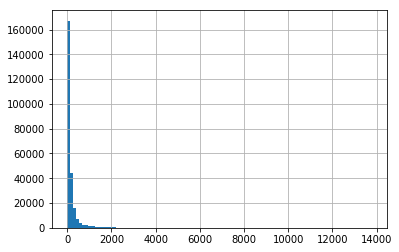

In [76]:
(episode['episode_duration'] / pd.Timedelta(days=1)).hist(bins =100)

In [77]:
len(episode[episode['episode_duration'] > pd.Timedelta(weeks=520)])

770

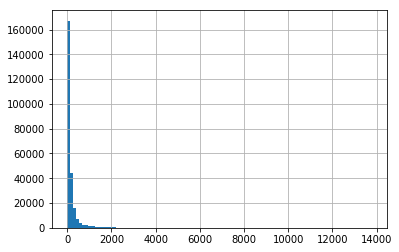

In [78]:
(episode['episode_duration'] / pd.Timedelta(days=1)).hist(bins =100)

In [79]:
last3years = episode[episode['start_date'] > '2015-01-01']

In [80]:
last3years.shape

(74172, 9)

In [81]:
len(last3years[(last3years['Tier2'] == '1') & (last3years['Tier3'] == '1')])/last3years.shape[0] *100

16.0721026802567

### Join episode to discharge

In [82]:
epi_discharge = pd.merge(discharge, 
                         episode, 
                         on=['Serial',   'Episode'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:1"
                        )

In [83]:
epi_discharge_left = pd.merge(episode,
                         discharge,
                         on=['Serial', 'Agency',  'Episode'], 
                         how='left', 
                         indicator=True, 
                         validate="1:1"
                        )

In [84]:
epi_discharge_left.groupby('_merge').size()

_merge
left_only        178
right_only         0
both          251333
dtype: int64

In [85]:
epi_discharge.columns

Index(['DischargeID', 'Serial', 'Episode', 'EventID', 'DischargeDate',
       'DateStarted', 'LetterToGP', 'LetterToClient', 'ModalityStatusCode',
       'ReasonForClosure', 'Agency_x', 'YPSelfHarmExit', 'YPUnsafeDrugExit',
       'YPOffendingExit', 'YPCAFExit', 'YPSaferSexExit', 'YPSexualHealthExit',
       'YPRegisteredGPExit', 'YPGoalsExit', 'DischargeDestination',
       'YPLeadProfessionalExit', 'YPMHServicesExit', 'YPYOTExit',
       'YPSexualExploitationExit', 'YPContactLearningDifficultyTreatExit',
       'YPSexuallyActiveTreatExit', 'EngagedInUnsafeSexAtTrtmntEnd',
       'YPFreqOfUseOfDrug1AtTrtmntExit', 'ChildProtectionIssues',
       'PlannedDateOfRecordRemoval', 'NDTMSDischargeDate',
       'NDTMSReasonForClosure', 'NDTMSDischargeEventID', 'PrisonExitReason',
       'PrisonExitDestination', 'ReferredTo', 'PreReleaseReviewDate',
       'YPOfferedSupportFromOtherServices', 'DateOfDeath', 'AUDITScore',
       'ImmunisationsAdministered', 'CounsellingDelivered',
       'Client

In [86]:
epi_discharge.groupby('_merge').size()

_merge
left_only      19951
right_only         0
both          251511
dtype: int64

In [87]:
epi_discharge['disch_not_epi'] = epi_discharge['_merge']
epi_discharge = epi_discharge.drop('_merge', axis=1).copy()

### Join client to epi_dicharge

In [88]:
client_epi_disch = pd.merge(client, 
                         epi_discharge, 
                         on=['Serial'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:m"
                        )

In [89]:
client_epi_disch.groupby('_merge').size()

_merge
left_only       9761
right_only       111
both          271351
dtype: int64

In [90]:
pd.crosstab(client_epi_disch['disch_not_epi'], client_epi_disch['_merge'])

_merge,left_only,right_only,both
disch_not_epi,,,
left_only,0,43,19908
right_only,0,0,0
both,0,68,251443


In [91]:
pd.crosstab(client_epi_disch['disch_not_epi'], client_epi_disch['Status'])

Status,Active,Discharged,Discussion,Post Treatment
disch_not_epi,,,,
left_only,456,18546,148,758
right_only,0,0,0,0
both,7594,241971,1549,329


In [92]:
client_epi_disch['client_not_epi_disch'] = client_epi_disch['_merge']
client_epi_disch = client_epi_disch.drop('_merge', axis=1).copy()

### Join referrals to client_epi_dicharge

In [93]:
referral = open_table_list_columns('Referral')

['ReferralID',
 'Serial',
 'Episode',
 'ReferrerID',
 'Organisation',
 'IsPrimary',
 'ReferralSource',
 'ReferralDate',
 'ReferralMadeDate',
 'ReferredModalityDate',
 'ReferralRoute',
 'AssessmentDate',
 'ReferredModalities',
 'AssessmentAgency',
 'TreatmentReferredOption1',
 'TreatmentReferredOption2',
 'TreatmentReferredOption3',
 'TreatmentReferredOptionOther',
 'PresentingProblem']


In [94]:
ref_client_epi_disch = pd.merge(referral, 
                         client_epi_disch, 
                         on=['Serial', 'Episode'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:m"
                        )

In [95]:
ref_client_epi_disch.groupby('_merge').size()

_merge
left_only      14915
right_only      9762
both          271461
dtype: int64

In [96]:
ref_client_epi_disch.shape

(296138, 103)

In [97]:
pp = pprint.PrettyPrinter()
pp.pprint(list(ref_client_epi_disch.columns))
    

['ReferralID',
 'Serial',
 'Episode',
 'ReferrerID',
 'Organisation',
 'IsPrimary',
 'ReferralSource',
 'ReferralDate',
 'ReferralMadeDate',
 'ReferredModalityDate',
 'ReferralRoute',
 'AssessmentDate',
 'ReferredModalities',
 'AssessmentAgency',
 'TreatmentReferredOption1',
 'TreatmentReferredOption2',
 'TreatmentReferredOption3',
 'TreatmentReferredOptionOther',
 'PresentingProblem',
 'CurrentEpisode',
 'Status',
 'Service',
 'ProjectCode',
 'Gender',
 'Nationality',
 'RelationshipStatus',
 'Ethnic_Origin',
 'Religion',
 'Sexuality',
 'NoFixedAbode',
 'Scrip_Index',
 'Alert',
 'CurrentKeyworker',
 'CaseNumber',
 'Office',
 'DischargeID',
 'EventID',
 'DischargeDate',
 'DateStarted',
 'LetterToGP',
 'LetterToClient',
 'ModalityStatusCode',
 'ReasonForClosure',
 'Agency_x',
 'YPSelfHarmExit',
 'YPUnsafeDrugExit',
 'YPOffendingExit',
 'YPCAFExit',
 'YPSaferSexExit',
 'YPSexualHealthExit',
 'YPRegisteredGPExit',
 'YPGoalsExit',
 'DischargeDestination',
 'YPLeadProfessionalExit',
 'YPMHSe

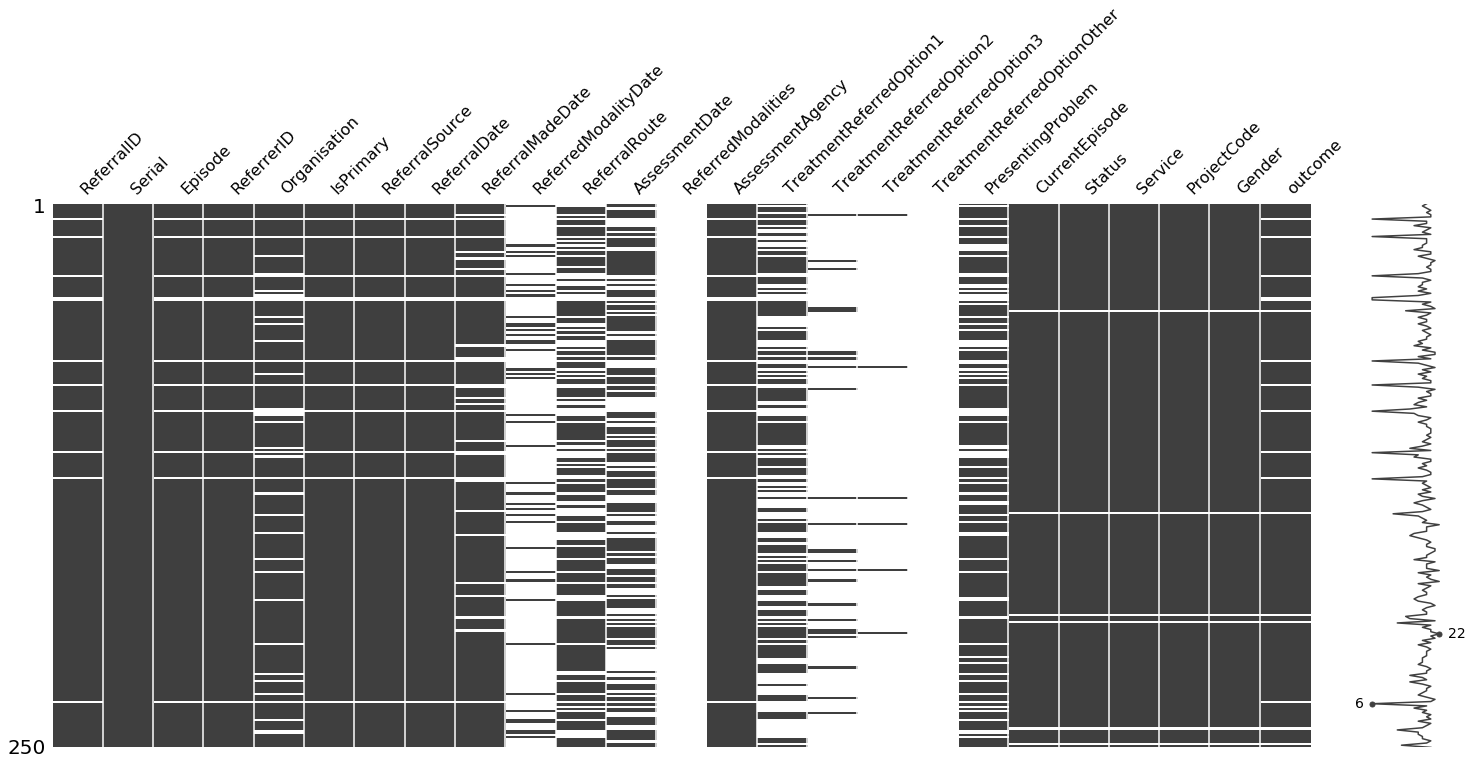

In [98]:
msno.matrix(ref_client_epi_disch[['ReferralID',
 'Serial',
 'Episode',
 'ReferrerID',
 'Organisation',
 'IsPrimary',
 'ReferralSource',
 'ReferralDate',
 'ReferralMadeDate',
 'ReferredModalityDate',
 'ReferralRoute',
 'AssessmentDate',
 'ReferredModalities',
 'AssessmentAgency',
 'TreatmentReferredOption1',
 'TreatmentReferredOption2',
 'TreatmentReferredOption3',
 'TreatmentReferredOptionOther',
 'PresentingProblem',
 'CurrentEpisode',
 'Status',
 'Service',
 'ProjectCode',
 'Gender',
 'outcome']].sample(250))
    

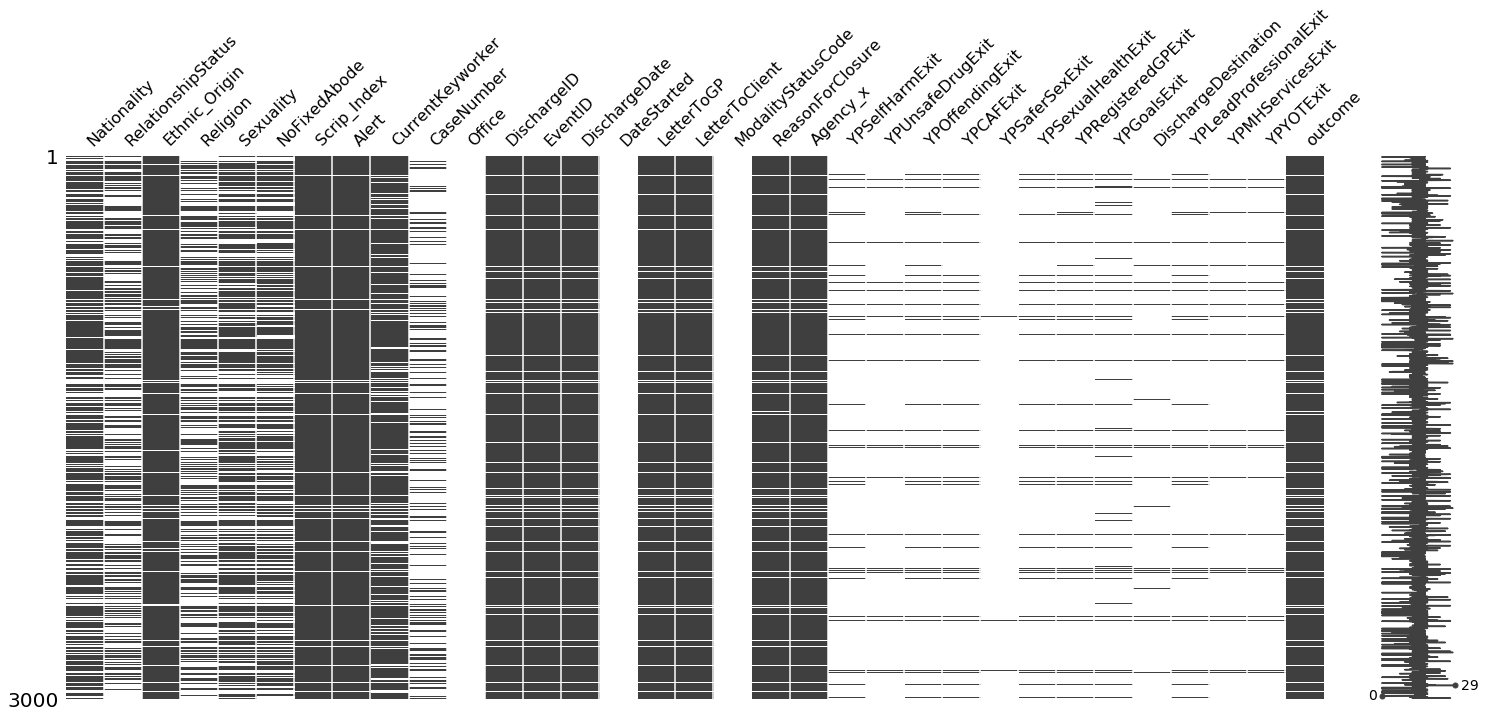

In [99]:
msno.matrix(ref_client_epi_disch[['Nationality',
 'RelationshipStatus',
 'Ethnic_Origin',
 'Religion',
 'Sexuality',
 'NoFixedAbode',
 'Scrip_Index',
 'Alert',
 'CurrentKeyworker',
 'CaseNumber',
 'Office',
 'DischargeID',
 'EventID',
 'DischargeDate',
 'DateStarted',
 'LetterToGP',
 'LetterToClient',
 'ModalityStatusCode',
 'ReasonForClosure',
 'Agency_x',
 'YPSelfHarmExit',
 'YPUnsafeDrugExit',
 'YPOffendingExit',
 'YPCAFExit',
 'YPSaferSexExit',
 'YPSexualHealthExit',
 'YPRegisteredGPExit',
 'YPGoalsExit',
 'DischargeDestination',
 'YPLeadProfessionalExit',
 'YPMHServicesExit',
 'YPYOTExit',
 'outcome']].sample(3000))
    

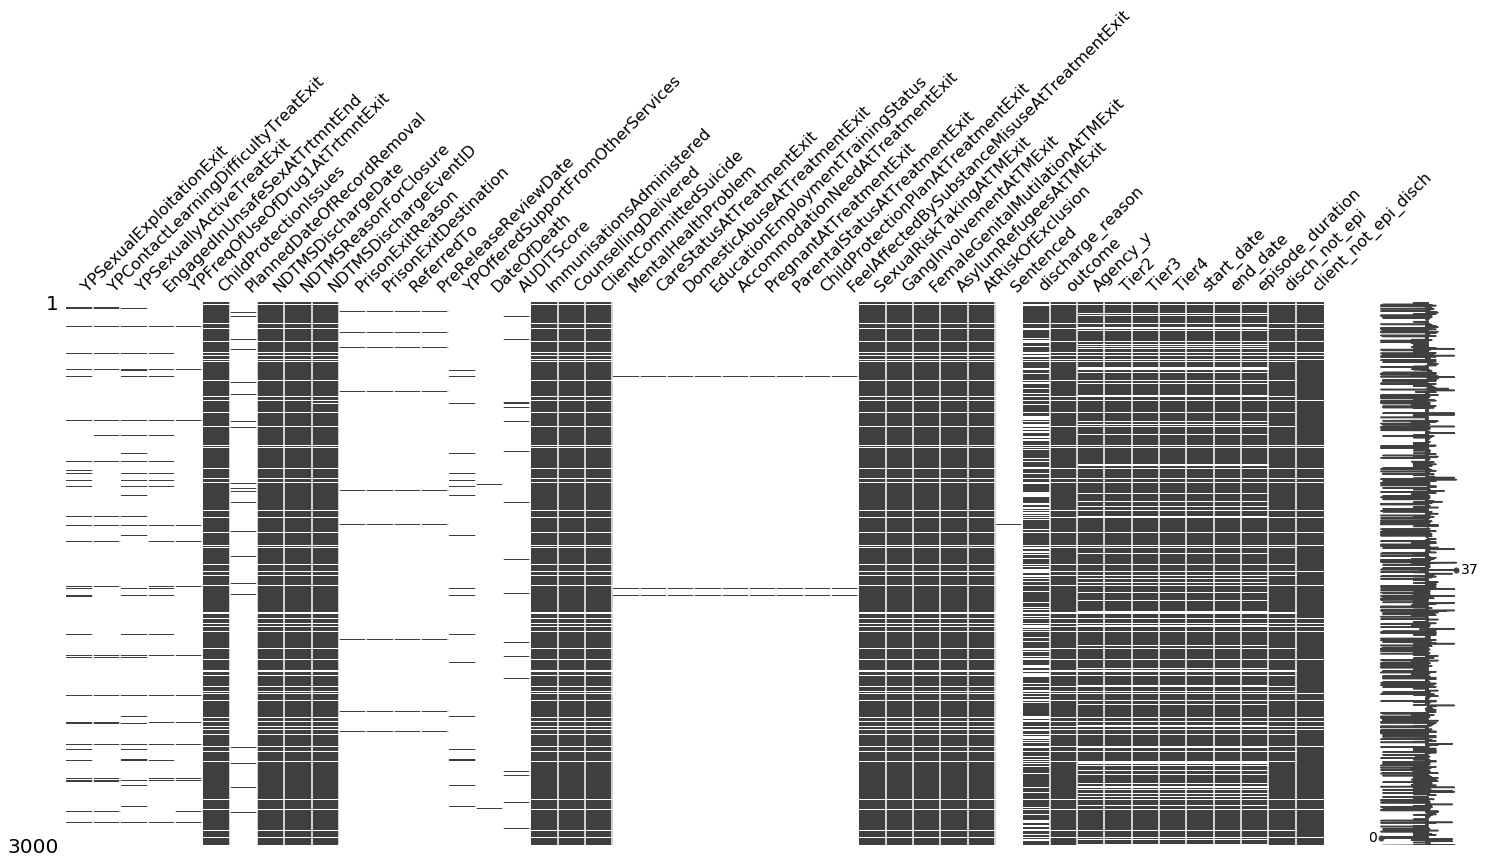

In [100]:
msno.matrix(ref_client_epi_disch[['YPSexualExploitationExit',
 'YPContactLearningDifficultyTreatExit',
 'YPSexuallyActiveTreatExit',
 'EngagedInUnsafeSexAtTrtmntEnd',
 'YPFreqOfUseOfDrug1AtTrtmntExit',
 'ChildProtectionIssues',
 'PlannedDateOfRecordRemoval',
 'NDTMSDischargeDate',
 'NDTMSReasonForClosure',
 'NDTMSDischargeEventID',
 'PrisonExitReason',
 'PrisonExitDestination',
 'ReferredTo',
 'PreReleaseReviewDate',
 'YPOfferedSupportFromOtherServices',
 'DateOfDeath',
 'AUDITScore',
 'ImmunisationsAdministered',
 'CounsellingDelivered',
 'ClientCommittedSuicide',
 'MentalHealthProblem',
 'CareStatusAtTreatmentExit',
 'DomesticAbuseAtTreatmentExit',
 'EducationEmploymentTrainingStatus',
 'AccommodationNeedAtTreatmentExit',
 'PregnantAtTreatmentExit',
 'ParentalStatusAtTreatmentExit',
 'ChildProtectionPlanAtTreatmentExit',
 'FeelAffectedBySubstanceMisuseAtTreatmentExit',
 'SexualRiskTakingAtTMExit',
 'GangInvolvementAtTMExit',
 'FemaleGenitalMutilationAtTMExit',
 'AsylumRefugeesAtTMExit',
 'AtRiskOfExclusion',
 'Sentenced',
 'discharge_reason',
 'outcome',
 'Agency_y',
 'Tier2',
 'Tier3',
 'Tier4',
 'start_date',
 'end_date',
 'episode_duration',
 'disch_not_epi',
 'client_not_epi_disch']].sample(3000))
    

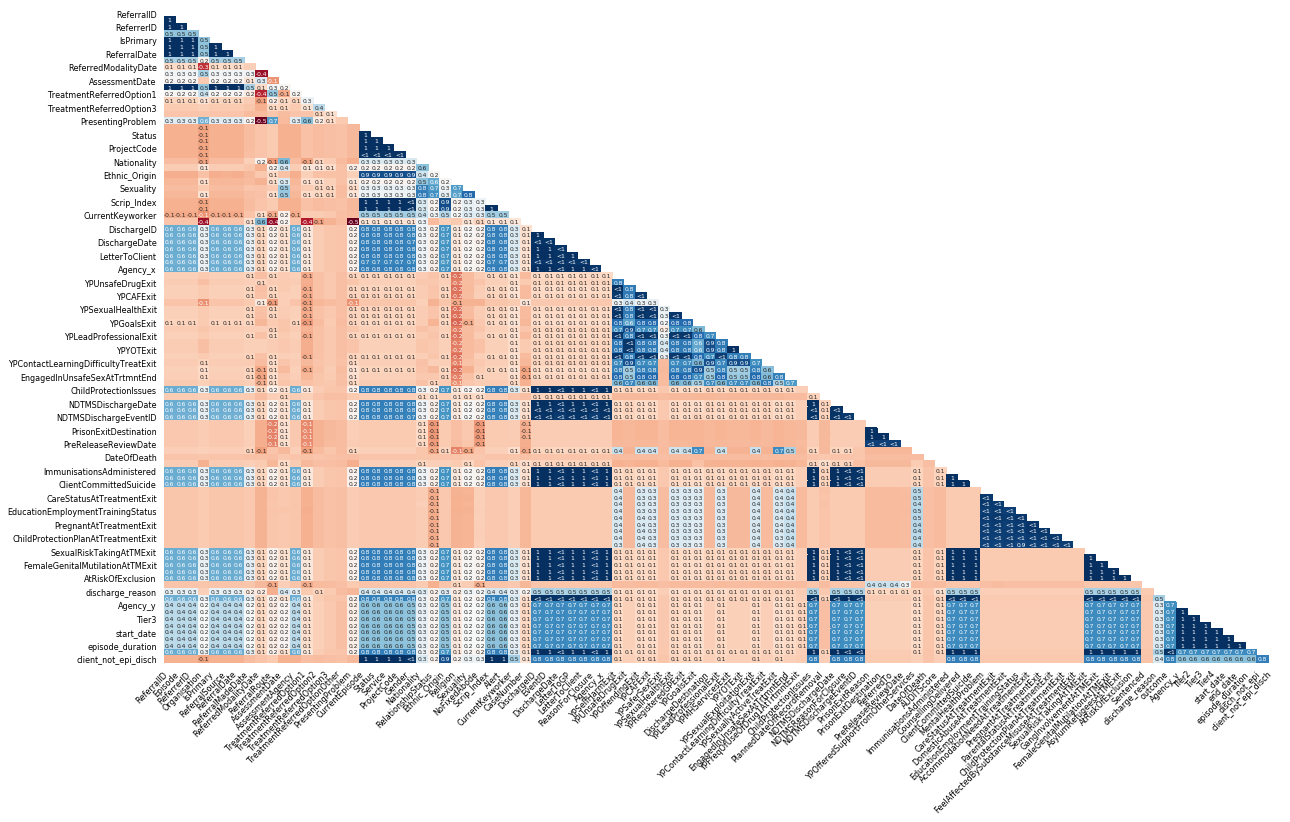

In [101]:
msno.heatmap(ref_client_epi_disch, fontsize=8)

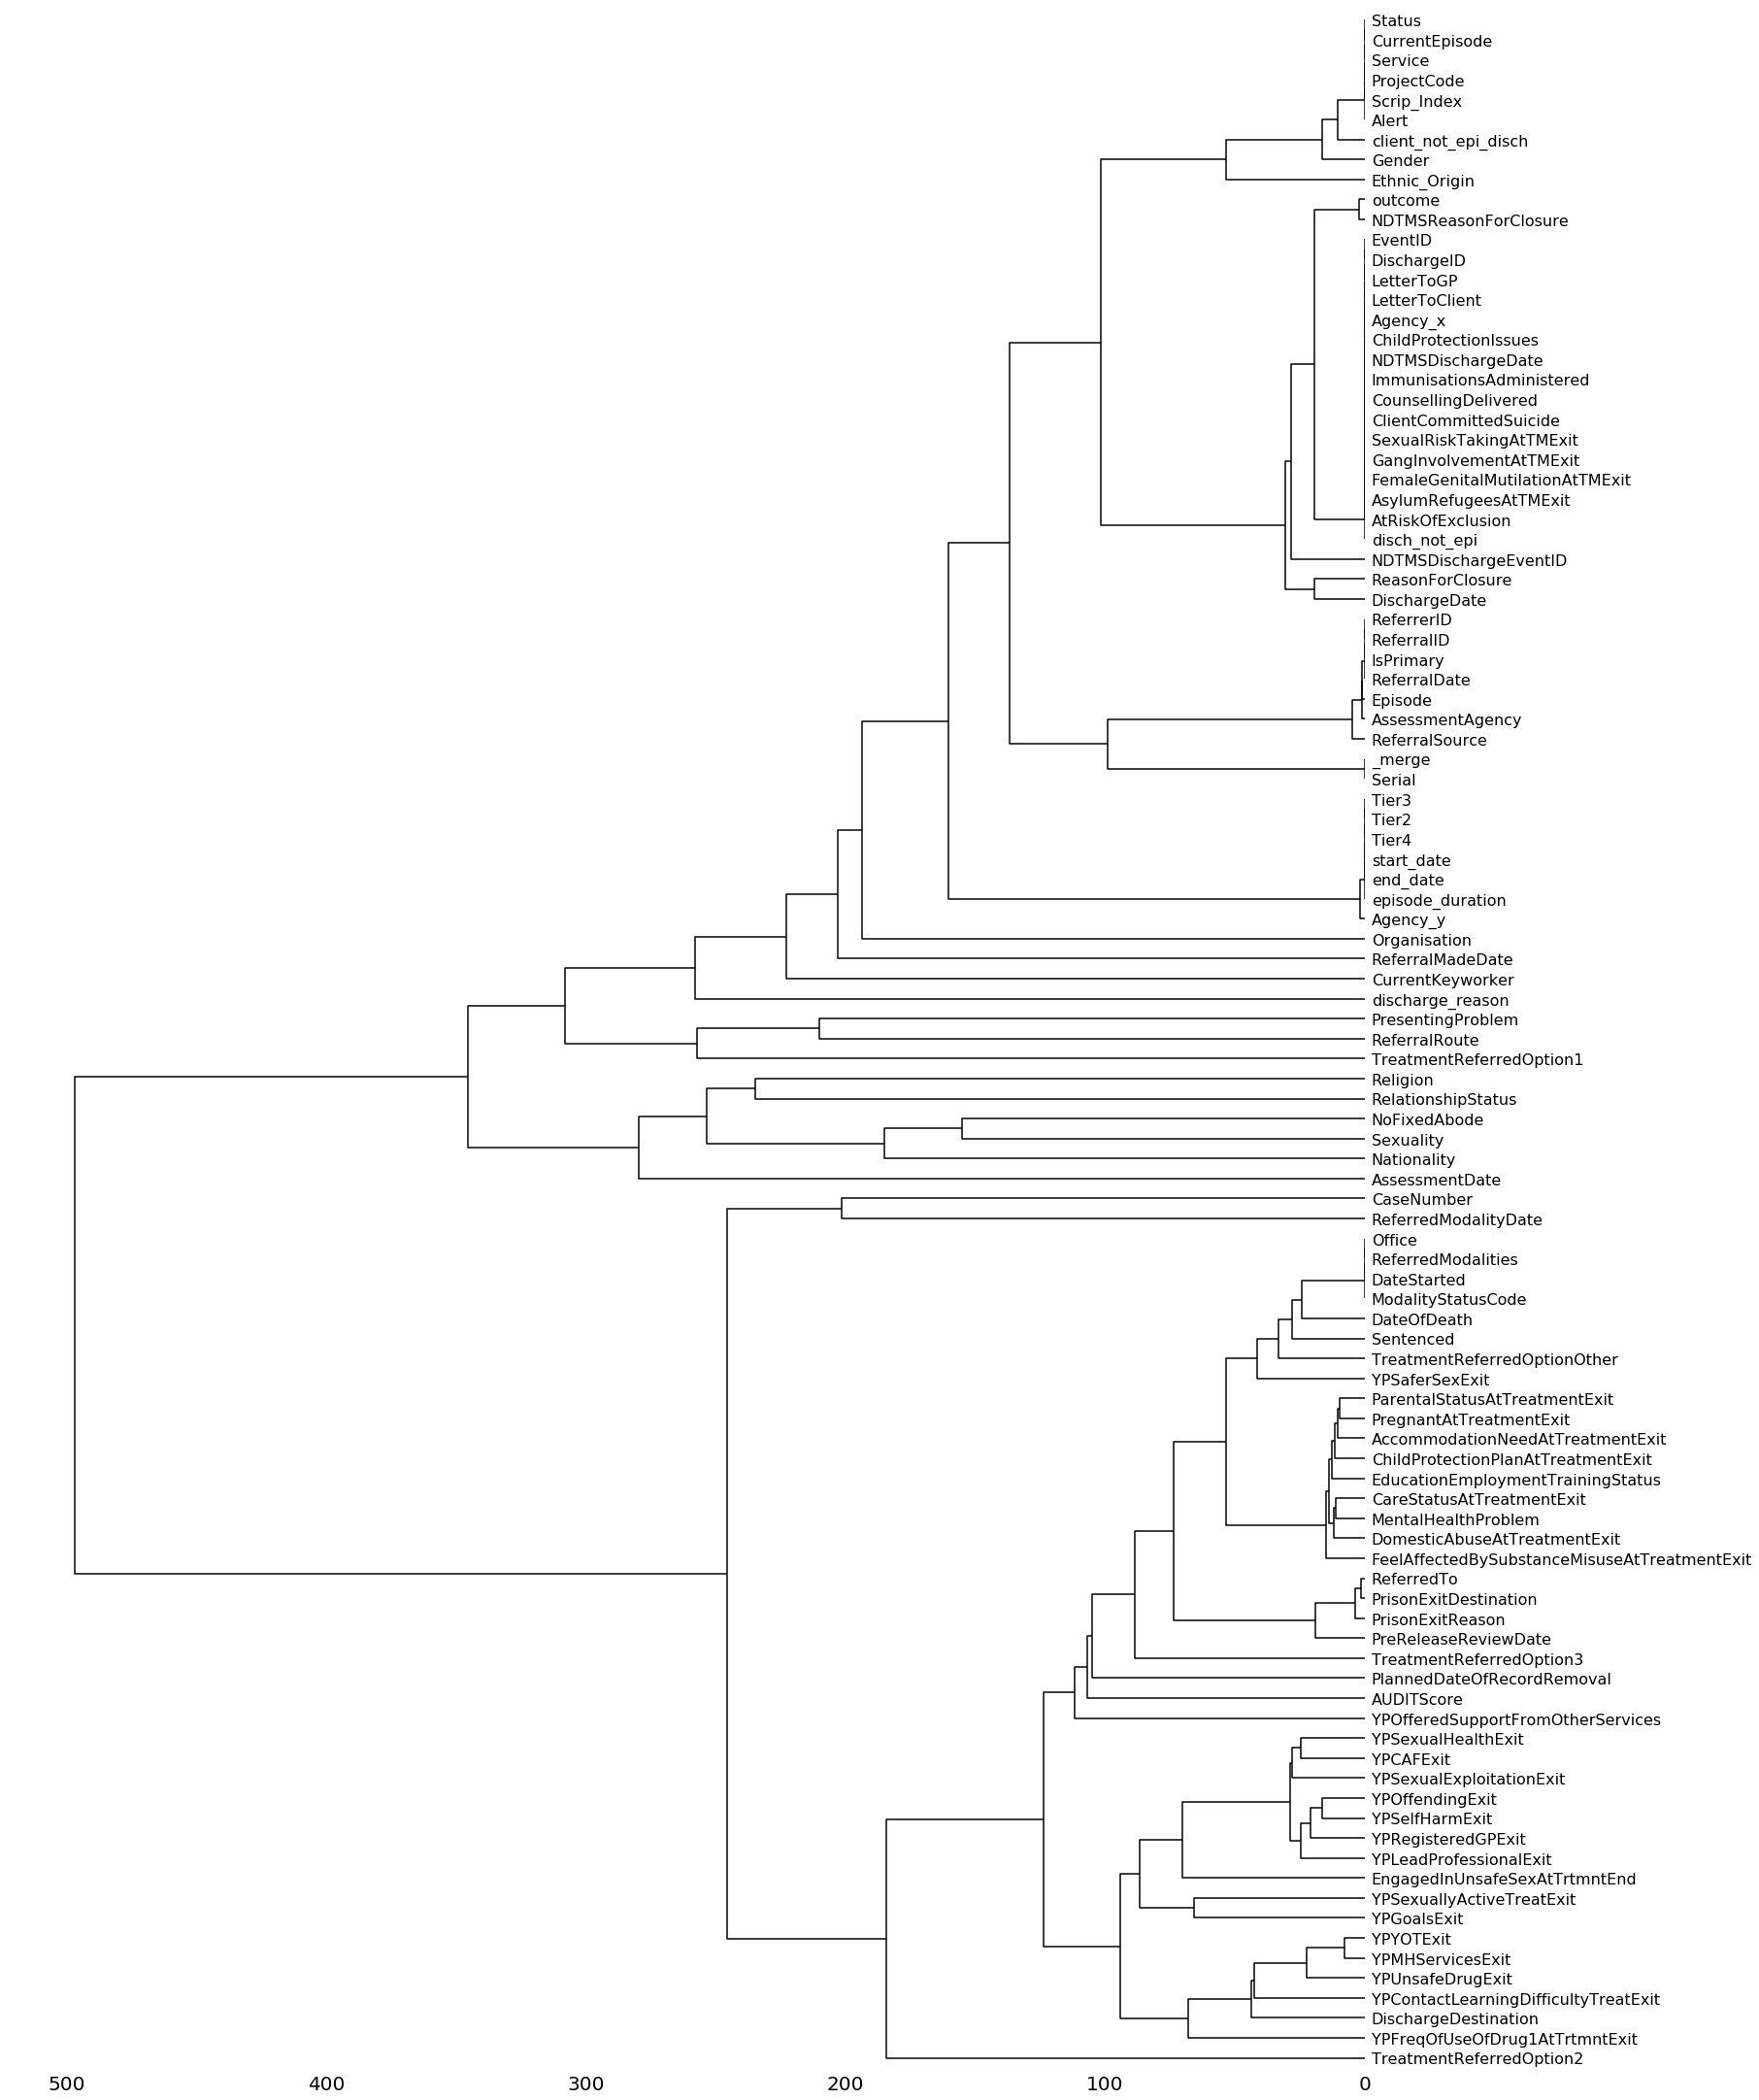

In [102]:
msno.dendrogram(ref_client_epi_disch, orientation='left')

In [103]:
ref_client_epi_disch['ReferralRoute'].value_counts()
#ref_client_epi_disch['ReferralSource'].sum().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

Drop in                  66812
Telephone                47582
Mandatory Appointment    27499
Fax                      19606
Email                    17695
Letter                   13705
Allocations Meeting       2901
Online                     890
Name: ReferralRoute, dtype: int64

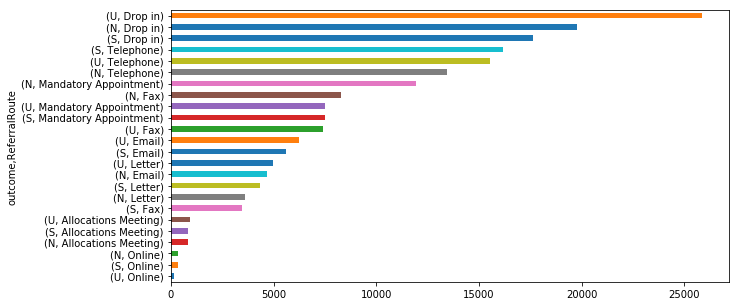

In [104]:
ref_client_epi_disch[['outcome','ReferralRoute']].groupby(['outcome','ReferralRoute']).size().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))
#ref_client_epi_disch['ReferralSource'].sum().sort_values(ascending=True).plot(kind = 'barh', figsize=(10, 5))

In [105]:
def plot_time_metric_byvar(df, metric, byvar):
    grouped = df.groupby([byvar, pd.Grouper(freq='D')])[metric].sum()
    by_day = grouped.unstack(byvar, fill_value=0)
    top = by_day.iloc[:, by_day.columns.isin(by_day.min().sort_values(ascending=False)[:10].index)]
    bottom = by_day.iloc[:, by_day.columns.isin(by_day.min().sort_values()[:10].index)]
    
    ax = top.plot()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylabel(metric)
    ax.set_xlabel('Date')
    ax.set_title('Top 10 {}s for {}'.format(byvar, metric))
    
    ay = bottom.plot()
    ay.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ay.set_ylabel(metric)
    ay.set_xlabel('Date')
    ay.set_title('Bottom 10 {}s for {}'.format(byvar, metric))

    return ax, ay

In [106]:
client_epi_disch['count'] = 1

In [107]:
client_epi_disch.index = client_epi_disch.end_date

In [108]:
grouped = client_epi_disch.groupby(['outcome', pd.Grouper(freq='Y')]).count()
    

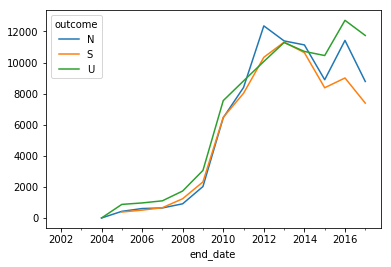

In [109]:
ax = grouped.unstack(level='outcome')['count'].plot()
ax

In [110]:
from scipy.stats import chi2_contingency

In [111]:
careplan = open_table_list_columns('Careplan')

['CarePlanID',
 'Serial',
 'Episode',
 'CarePlanDate',
 'DetoxType',
 'DateTeamDecision',
 'ReviewDate',
 'EventID',
 'v',
 'Keyworker',
 'EventIDClose',
 'CareplanCompleteDate']


In [112]:
careplan.head()

,CarePlanID,Serial,Episode,CarePlanDate,DetoxType,DateTeamDecision,ReviewDate,EventID,v,Keyworker,EventIDClose,CareplanCompleteDate
0,99859,1710259,1,Nov 15 2012 12:00AM,NaN,NaN,NaN,3555249,Yes,Keyworker1424,3963723,May 16 2013 12:00AM
1,101611,1815845,1,Jan 24 2013 12:00AM,NaN,NaN,NaN,3687271,Yes,Keyworker1424,3971099,May 16 2013 12:00AM
2,101667,1506802,1,Nov 5 2012 12:00AM,NaN,NaN,NaN,3691487,Yes,Keyworker1424,3972571,May 20 2013 12:00AM
3,102064,1527696,1,Feb 14 2013 12:00AM,NaN,NaN,NaN,3718561,Yes,Keyworker1424,3966055,May 16 2013 12:00AM
4,102366,1957970,1,Feb 7 2013 12:00AM,NaN,NaN,NaN,3742657,Yes,Keyworker1800,NaN,NaN


In [113]:
events1 = open_table_list_columns('Events_01')

['EventID',
 'EventDate',
 'Duration',
 'AppointmentType',
 'Attended',
 'AddedBy',
 'Serial',
 'Episode',
 'Worker',
 'Location',
 'ProgramName',
 'Attendence',
 'SeenBy']


In [114]:
events1

,EventID,EventDate,Duration,AppointmentType,Attended,AddedBy,Serial,Episode,Worker,Location,ProgramName,Attendence,SeenBy
0,84023,Nov 7 2006 8:30AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN
1,84028,Oct 11 2006 10:00AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN
2,84031,Jan 9 2007 10:00AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN
3,84034,Nov 14 2006 8:30AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN
4,84058,May 30 2007 10:00AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN
5,84059,Mar 27 2007 10:00AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN
6,84067,May 15 2007 8:30AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN
7,84070,Feb 22 2007 10:00AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN
8,84075,May 29 2007 10:00AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN
9,84076,Mar 13 2007 10:00AM,60,Client Record Management,0,Keyworker1781,1954725,1,Keyworker1781,Unit 12 Woodhead Road,NaN,Attended appointment,NaN


In [115]:
events2 =  open_table_list_columns('Events_02')

['EventID',
 'EventDate',
 'Duration',
 'AppointmentType',
 'Attended',
 'AddedBy',
 'Serial',
 'Episode',
 'Worker',
 'Location',
 'ProgramName',
 'Attendence',
 'SeenBy']


In [116]:
events2.shape

(500000, 13)

In [117]:
events3 = open_table_list_columns('Events_03')

['EventID',
 'EventDate',
 'Duration',
 'AppointmentType',
 'Attended',
 'AddedBy',
 'Serial',
 'Episode',
 'Worker',
 'Location',
 'ProgramName',
 'Attendence',
 'SeenBy']


In [118]:
events3.shape

(500000, 13)

In [119]:
events_join = pd.merge(events1,
                         events2,
                         on=['Serial', 'EventID'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:1"
                        )

In [120]:
events_join['_merge'].value_counts()

right_only    500000
left_only      96520
both               0
Name: _merge, dtype: int64

In [121]:
import glob, os   


path = '/volumes/ellieking/Checked/'                     # use your path
all_files = glob.glob(os.path.join(path, "Events_*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f, dtype=object, encoding = "iso-8859-1") for f in all_files)
events   = pd.concat(df_from_each_file, ignore_index=True)



In [122]:
events.shape

(8492417, 13)

In [123]:
events.columns

Index(['EventID', 'EventDate', 'Duration', 'AppointmentType', 'Attended',
       'AddedBy', 'Serial', 'Episode', 'Worker', 'Location', 'ProgramName',
       'Attendence', 'SeenBy'],
      dtype='object')

In [124]:
events.EventID.nunique()

8492417

In [125]:
events.Serial.nunique()

187574

In [126]:
print('On average the are {} events per Serial'.format(
    events.EventID.nunique()/events.Serial.nunique()))

On average the are 45.27502212460149 events per Serial


In [127]:
events.groupby('EventID')['EventDate'].nunique().describe()

count    8492417.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: EventDate, dtype: float64

Each row is a unique event and all events have only one eventdate

In [128]:
events_types2 = open_table_list_columns('EventsTypes_02')

['EventID', 'ID', 'EventType', 'EventName']


In [129]:

all_files_type = glob.glob(os.path.join(path, "EventsTypes_*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file_type = (pd.read_csv(f, dtype=object, encoding = "iso-8859-1") for f in all_files_type)
events_types   = pd.concat(df_from_each_file_type, ignore_index=True)



In [130]:
events_types.shape

(13018237, 4)

In [131]:
events_types.head(20)

,EventID,ID,EventType,EventName
0,6794002,9689895,CarePlanStartedNoEvent,Start Recover Plan
1,6794002,9689896,KeyworkSession1,Keywork session
2,6794002,9689897,AssessmentAddactionAlcohol,Addaction Alcohol Assessment
3,6794003,9689898,PhoneCallClient,Telephone Client
4,6794003,9689899,Text,Text Message
5,6794004,9689900,CarePlanReview,Care Plan Review
6,6794004,9689902,KeyworkSession,Care Planned Keywork
7,6794004,9689903,DrugTest,Drug Test
8,6794004,9689905,TOPAssessment,TOP Assessment
9,6794004,9689907,RiskAssessmentReview,Risk Assessment


In [132]:
events_types.EventID.nunique()

8894954

In [133]:
events_types.ID.nunique()

13018237

In [134]:
events_types.EventType.nunique()

2653

In [135]:
events_types.EventName.nunique()

4692

In [136]:
events_types.groupby('EventID')['ID'].nunique().describe()

count    8.894954e+06
mean     1.463553e+00
std      1.179034e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.500000e+01
Name: ID, dtype: float64

In [137]:
events_types.ID.nunique()/events_types.EventID.nunique()

1.4635530436694781

In [138]:
harm_reduction = open_table_list_columns('HarmReduction')

['Serial',
 'Episode',
 'ID',
 'EventID',
 'HarmRAssessmentDate',
 'AssessingWorker',
 'AssessmentLocation',
 'LastInjected',
 'InjectingFrequency',
 'MainDrugInjected',
 'OtherDrugsInjected',
 'InjectSelf',
 'InjectByWhom',
 'EverShared',
 'Shared4Weeks',
 'TimeShared4Weeks',
 'ClientRegistered',
 'GPReferralMade',
 'DentistRegistered',
 'DentalReferral',
 'LosingConsciousness',
 'HospitalRequired',
 'ClientDrugTreatment1',
 'AccommodationNeed',
 'AccommodationType',
 'AccommodationStatus',
 'ClientLivingWith',
 'FreindRelativeSupport',
 'AnyOtherSupport',
 'ClientDrugTreatment2',
 'ClientDrugTreatment3',
 'AgeFirstInjected',
 'NeedlesEquipment',
 'BarrelsEquipment',
 'SyringesEquipment',
 'PipesStrawsEquipment',
 'Needles',
 'Barrels',
 'Syringes',
 'PipesStraws',
 'SpoonsFoil',
 'Water',
 'OtherParaphenalia',
 'Arm',
 'Leg',
 'Neck',
 'Groin',
 'Feet',
 'Hands',
 'Buttock',
 'Abdomen',
 'Head',
 'Back',
 'OtherPleaseDetail',
 'ClientCollectNExEquipmentFor',
 'ClientPregnant',
 'Empl

In [139]:
harm_reduction.head()

,Serial,Episode,ID,EventID,HarmRAssessmentDate,AssessingWorker,AssessmentLocation,LastInjected,InjectingFrequency,MainDrugInjected,...,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94
0,998264,1,10468,2894080,Mar 17 2012 12:00AM,Keyworker1380,Bedfordshire Tier 2 Services,Does not inject,used 2-6 days per week,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,675758,1,11853,3233703,Jul 3 2012 12:00AM,Keyworker712,Bedfordshire Tier 2 Services,Yesterday,used daily,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1548575,1,10260,2856539,Mar 2 2012 12:00AM,Keyworker712,Bedfordshire Tier 2 Services,Other - please specify,not known,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97479,1,10884,2994602,Apr 25 2012 12:00AM,Keyworker1343,Bedfordshire Tier 2 Services,NaN,used 2-6 days per week,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1868069,3,11383,3108127,Jun 19 2012 12:00AM,Keyworker431,Bedfordshire Tier 2 Services,Does not inject,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
modality = open_table_list_columns('Modality')

['Serial',
 'Episode',
 'ID',
 'TreatmentModality',
 'Agency',
 'ModalityReferralDate',
 'DateFirstAppointment',
 'StartDate',
 'EndDate',
 'ModalityEndReason',
 'EventID',
 'NDTMS',
 'Used',
 'Settings']


In [141]:
modality.head()

,Serial,Episode,ID,TreatmentModality,Agency,ModalityReferralDate,DateFirstAppointment,StartDate,EndDate,ModalityEndReason,EventID,NDTMS,Used,Settings
0,1369062,1,1129,75,Dundee,Sep 18 2009 12:00AM,Sep 18 2009 12:00AM,Sep 18 2009 12:00AM,Feb 11 2010 12:00AM,6,6692,1,0,0
1,1702258,1,150225,10,Borders,Feb 8 2010 12:00AM,Feb 8 2010 12:00AM,Feb 8 2010 12:00AM,NaN,NaN,276982,1,0,1
2,1293701,1,76,10,Borders,Aug 11 2009 12:00AM,Aug 11 2009 12:00AM,Aug 11 2009 12:00AM,Jun 25 2010 12:00AM,1,790,1,0,0
3,1293701,1,77,75,Borders,Aug 11 2009 12:00AM,Aug 11 2009 12:00AM,Aug 11 2009 12:00AM,Jun 25 2010 12:00AM,1,790,1,0,0
4,1618438,1,78,10,Borders,May 14 2009 12:00AM,May 14 2009 12:00AM,May 14 2009 12:00AM,Apr 6 2010 12:00AM,5,791,1,0,0


### referral

In [142]:
referral = open_table_list_columns('Referral')

['ReferralID',
 'Serial',
 'Episode',
 'ReferrerID',
 'Organisation',
 'IsPrimary',
 'ReferralSource',
 'ReferralDate',
 'ReferralMadeDate',
 'ReferredModalityDate',
 'ReferralRoute',
 'AssessmentDate',
 'ReferredModalities',
 'AssessmentAgency',
 'TreatmentReferredOption1',
 'TreatmentReferredOption2',
 'TreatmentReferredOption3',
 'TreatmentReferredOptionOther',
 'PresentingProblem']


In [143]:
referral_discharge = pd.merge(referral,
                         discharge,
                         on=['Serial', 'Episode'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:1"
                        )

In [144]:
referral_discharge.groupby('_merge').size()

_merge
left_only      14915
right_only         1
both          271461
dtype: int64

In [145]:
referral_episode = pd.merge(referral,
                         episode,
                         on=['Serial', 'Episode'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:1"
                        )

In [146]:
referral_episode.groupby('_merge').size()

_merge
left_only      34865
right_only         0
both          251511
dtype: int64

In [147]:
14915 +19951

34866

In [148]:
referral.head()

,ReferralID,Serial,Episode,ReferrerID,Organisation,IsPrimary,ReferralSource,ReferralDate,ReferralMadeDate,ReferredModalityDate,ReferralRoute,AssessmentDate,ReferredModalities,AssessmentAgency,TreatmentReferredOption1,TreatmentReferredOption2,TreatmentReferredOption3,TreatmentReferredOptionOther,PresentingProblem
0,261,1448335,1,238,Dundee Survival Group,0,512,May 16 2009 12:00AM,NaN,Jun 24 2009 12:00AM,Drop in,Jun 24 2009 12:00AM,NaN,Dundee,Alcohol Other structured treatment,NaN,NaN,NaN,Alcohol
1,262,1369062,1,215,Dundee City Social Work Drug and Alcohol Team,0,19,Jul 9 2009 12:00AM,NaN,Jul 13 2009 12:00AM,Drop in,Jul 13 2009 12:00AM,NaN,Dundee,Alcohol Other structured treatment,Other,NaN,NaN,Alcohol
2,263,568952,1,215,Dundee City Social Work Drug and Alcohol Team,0,19,Aug 3 2009 12:00AM,NaN,Jul 9 2009 12:00AM,Drop in,Jul 9 2009 12:00AM,NaN,Training,Alcohol Other structured treatment,NaN,NaN,NaN,Drugs
3,264,1230120,1,202,Self,0,4,Jul 16 2009 12:00AM,NaN,Jul 22 2009 12:00AM,Drop in,Jul 22 2009 12:00AM,NaN,Dundee,Alcohol Other structured treatment,NaN,NaN,NaN,Drugs
4,77357,1230120,2,196,TAY COURT SURGERY,0,3,Feb 15 2011 12:00AM,Feb 3 2011 12:00AM,NaN,Letter,NaN,NaN,Dundee,Specialist prescribing,Advice and information,NaN,NaN,Drugs


In [149]:
risk = open_table_list_columns('RiskAssessment')

['RiskAssessmentID',
 'Serial',
 'Episode',
 'EventID',
 'AssessedBy',
 'AssessmentStage',
 'RiskToSelf',
 'RiskFromOthers',
 'RiskToChildren',
 'RiskToFamily',
 'RiskGeneral',
 'RiskToStaff',
 'SystemAlert',
 'SafeguardingConcern',
 'DateRiskManagementCreated',
 'DateRiskManagementUpdated',
 'CopyOfPlan',
 'RisksSubstanceUseHistorical',
 'RisksSubstanceUseCurrent',
 'PsychologicalHealtHistorical',
 'PsychologicalHealtCurrent',
 'PhysicalHealthHistorical',
 'PhysicalHealthCurrent',
 'SelfHarmHistorical',
 'SelfHarmCurrent',
 'SuicidalIdeationHistorical',
 'SuicidalIdeationCurrent',
 'SuicideAttemptsHistorical',
 'SuicideAttemptsCurrent',
 'BehaviourImpactHistorical',
 'BehaviourImpactCurrent',
 'OtherServiceUserHistorical',
 'OtherServiceUserCurrent',
 'VulnerableAdultHistorical',
 'VulnerableAdultCurrent',
 'DisinhibitedBehaviourHistorical',
 'DisinhibitedBehaviourCurrent',
 'SexualAbuseHistorical',
 'SexualAbuseCurrent',
 'DomesticAbuseHistorical',
 'DomesticAbuseCurrent',
 'Evidence

In [150]:
risk.head()

,RiskAssessmentID,Serial,Episode,EventID,AssessedBy,AssessmentStage,RiskToSelf,RiskFromOthers,RiskToChildren,RiskToFamily,...,RiskToStaffHistorical,RiskToStaffCurrent,DrivesInfluenceOfDrugsHistorical,DrivesInfluenceOfDrugsCurrent,RiskGeneralOtherServiceHistorical,RiskGeneralOtherServiceCurrent,MentalCapacityHistorical,MentalCapacityCurrent,RiskAssessmentIDPopulatedFrom,OldRiskAssessmentID
0,1,175000,1,6737020,Keyworker782,Initial Risk Assessment,No,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,175000,1,6737022,Keyworker782,Formal Review,No,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,No,Not Known,Yes,Not Known,NaN,NaN
2,3,267468,1,6740722,Keyworker304,Initial Risk Assessment,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,267468,1,6740726,Keyworker304,Change in Circumstances Review,Yes,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1685984,1,6778318,Keyworker304,Initial Risk Assessment,Yes,Yes,Yes,Yes,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
scripts = open_table_list_columns('Scripts_3')

['Serial',
 'Episode',
 'Script_Index',
 'Medication_Ceased_Date',
 'Medication_Started_Date',
 'Clinician_Serial',
 'Pharmacy_Code',
 'Printed_Date',
 'Printed',
 'Active',
 'Day1',
 'Day1_Amount',
 'Day2',
 'Day2_Amount',
 'Day3',
 'Day3_Amount',
 'Day4',
 'Day4_Amount',
 'Day5',
 'Day5_Amount',
 'Day6',
 'Day6_Amount',
 'Day7',
 'Day7_Amount',
 'Day8',
 'Day8_Amount',
 'Day9',
 'Day9_Amount',
 'Day10',
 'Day10_Amount',
 'Day11',
 'Day11_Amount',
 'Day12',
 'Day12_Amount',
 'Day13',
 'Day13_Amount',
 'Day14',
 'Day14_Amount',
 'Treat_Type',
 'Treat_Drug_ID',
 'Treat_Drug',
 'Treat_Controlled_Drug',
 'Treat_ID',
 'Treat_Plan',
 'Treat_Dosage_Instruction',
 'Treat_Plan_Selected',
 'Treat_No_Days_Plan',
 'Treat_Start_Date',
 'Treat_Finish_Date',
 'Treat_NextDue_Date',
 'Treat_Repeat_Until',
 'Treat_Every_Days',
 'Treat_Minimum',
 'Treat_Maximum',
 'Treat_Titration',
 'Treat_Amount',
 'Treat_Issue_Number',
 'Treat_Daily_Dose',
 'Treat_Total_Dispensed',
 'Treat_TotalInWords',
 'Treat_Main

In [152]:
tag_manager = open_table_list_columns('TagManager')

['TagID',
 'Serial',
 'Episode',
 'TagAppliedDate',
 'TagType',
 'TagClosedDate',
 'TagStatus',
 'EventID',
 'EventIDClose']


In [153]:
tag_manager.head()

,TagID,Serial,Episode,TagAppliedDate,TagType,TagClosedDate,TagStatus,EventID,EventIDClose
0,92,1603551,1,Dec 2 2009 12:00AM,PPO,Feb 18 2010 12:00AM,Closed,9786,3542106
1,93,1603551,1,Dec 2 2009 12:00AM,In prison - Sentenced,Feb 13 2010 12:00AM,Closed,9787,260179
2,94,1180225,1,Dec 2 2009 12:00AM,PPO,May 12 2010 12:00AM,Closed,9812,3542133
3,95,550660,1,Dec 2 2009 12:00AM,PPO,Apr 22 2010 12:00AM,Closed,9815,3542144
4,96,1454966,1,Dec 2 2009 12:00AM,PPO,Jan 12 2011 12:00AM,Closed,9798,3542125


In [154]:
top = open_table_list_columns('TOP')

['Serial',
 'Episode',
 'ID',
 'InterviewDate',
 'TreatmentStage',
 'KeyworkerName',
 'S1AlcoholAverage',
 'S1AlcoholWeek4',
 'S1AlcoholWeek3',
 'S1AlcoholWeek2',
 'S1AlcoholWeek1',
 'S1AlcoholTotal',
 'S1OpiatesAverage',
 'S1OpiatesWeek4',
 'S1OpiatesWeek3',
 'S1OpiatesWeek2',
 'S1OpiatesWeek1',
 'S1OpiatesTotal',
 'S1CrackAverage',
 'S1CrackWeek4',
 'S1CrackWeek3',
 'S1CrackWeek2',
 'S1CrackWeek1',
 'S1CrackTotal',
 'S1CocaineAverage',
 'S1CocaineWeek4',
 'S1CocaineWeek3',
 'S1CocaineWeek2',
 'S1CocaineWeek1',
 'S1CocaineTotal',
 'S1AmphetaminesAverage',
 'S1AmphetaminesWeek4',
 'S1AmphetaminesWeek3',
 'S1AmphetaminesWeek2',
 'S1AmphetaminesWeek1',
 'S1AmphetaminesTotal',
 'S1CannabisAverage',
 'S1CannabisWeek4',
 'S1CannabisWeek3',
 'S1CannabisWeek2',
 'S1CannabisWeek1',
 'S1CannabisTotal',
 'S1OtherName',
 'S1OtherAverage',
 'S1OtherWeek4',
 'S1OtherWeek3',
 'S1OtherWeek2',
 'S1OtherWeek1',
 'S1OtherTotal',
 'S2InjectedWeek4',
 'S2InjectedWeek3',
 'S2InjectedWeek2',
 'S2InjectedWee

In [155]:
top.head()

,Serial,Episode,ID,InterviewDate,TreatmentStage,KeyworkerName,S1AlcoholAverage,S1AlcoholWeek4,S1AlcoholWeek3,S1AlcoholWeek2,...,DAYSVOLNTotal,DAYSVOLNNA,UPDWORKWeek4,UPDWORKWeek3,UPDWORKWeek2,UPDWORKWeek1,UPDWORKTotal,UPDWORKNA,UNSTHSE,UNSTHSENA
0,1782109,3,341933,Aug 12 2015 12:00AM,B,Keyworker124,13,7,7,7,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,361783,2,293885,Nov 13 2014 12:00AM,B,Keyworker124,10,7,3,7,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,361783,2,238063,Jan 29 2014 12:00AM,B,Keyworker124,20,7,7,7,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,1175149,2,297235,Nov 25 2014 12:00AM,B,Keyworker124,34,7,7,7,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,1958928,1,297815,Nov 28 2014 12:00AM,B,Keyworker124,25,7,7,7,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [156]:
top_plus = open_table_list_columns('TOPPlus')

['TOPPlusID',
 'Serial',
 'Episode',
 'TOPID',
 'ChildrenResponsibility',
 'ChildrenServices',
 'ChildProtectionPlanOn',
 'ChildProtectionPlanOff',
 'HepBInterventionStatus',
 'HepBVaccinationCount',
 'HepCInterventionStatus',
 'HepCTestDate',
 'HepCResult',
 'GPVisits',
 'GPSubstanceUse',
 'GPEmergencies',
 'HospitalVisits',
 'HospitalSubstanceUse',
 'HospitalEmergencies',
 'HarmReductionAdvice',
 'NeedleProgramme',
 'MedicalInterventionsBBV',
 'MedicalInterventionsOther',
 'PeerSupport',
 'RecoveryMutualAid',
 'FamilySupport',
 'ParentingSupport',
 'HousingSupport',
 'EmploymentSupport',
 'RecoveryTrainingSupport',
 'WorkProjects',
 'RecoveryCheckUp',
 'RelapsePrevention',
 'ContinuedRecovery',
 'ComplementaryTherapies',
 'RecoveryOther',
 'ActionPlannedInterventions',
 'BriefIntervention',
 'MotivationalInterventions',
 'ContingencyManagement',
 'NetworkInterventions',
 'CognitiveInterventions',
 'MentalHealthProblems',
 'PsychodynamicTherapy',
 'TwelveStepWork',
 'CounsellingBACP',

In [157]:
top_plus.head()

,TOPPlusID,Serial,Episode,TOPID,ChildrenResponsibility,ChildrenServices,ChildProtectionPlanOn,ChildProtectionPlanOff,HepBInterventionStatus,HepBVaccinationCount,...,PHDIAM,PHNALT,PHCHLOR,PHACAMP,PHNALME,PHDISULF,PHOTHER,RECHEPC,RECDOMV,RECTHNAL
0,1,165537,1,687,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,1083822,1,688,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3,1083822,1,689,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,818285,1,690,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,818285,1,691,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [158]:
open_table_list_columns('ClientInformationReview')

['CIRID',
 'Serial',
 'Episode',
 'EventID',
 'CIRDT',
 'CIRPREGNANT',
 'CIRPRTST',
 'CIRCLDWT',
 'CIREHCSC',
 'CIRMTHTN',
 'CIRCRTMHN',
 'InformationChanges',
 'Agency',
 'CIRPREGNANTCheck',
 'CIRPRTSTCheck',
 'CIRCLDWTCheck',
 'CIREHCSCCheck',
 'CIRMTHTNCheck',
 'CIRCRTMHNCheck']


,CIRID,Serial,Episode,EventID,CIRDT,CIRPREGNANT,CIRPRTST,CIRCLDWT,CIREHCSC,CIRMTHTN,CIRCRTMHN,InformationChanges,Agency,CIRPREGNANTCheck,CIRPRTSTCheck,CIRCLDWTCheck,CIREHCSCCheck,CIRMTHTNCheck,CIRCRTMHNCheck
0,6,1879838,1,8910733,Apr 2 2017 12:00AM,N,13,0,NaN,NaN,NaN,Yes,Herefordshire,0,0,0,0,0,0
1,7,1756672,2,8912513,Apr 3 2017 12:00AM,N,13,0,5,1,3,Yes,Wigan Adult,0,0,0,1,1,1
2,8,1912233,2,8914005,Apr 1 2017 12:00AM,N,501,0,NaN,NaN,NaN,No,Herefordshire,0,0,0,0,0,0
3,10,1298329,5,8915387,Apr 3 2017 12:00AM,N,14,0,5,1,3,Yes,Wigan Adult,0,0,0,1,1,1
4,12,1676901,1,8917774,Apr 4 2017 12:00AM,N,14,0,NaN,1,3,Yes,Wigan Adult,0,0,0,0,1,1
5,14,1268085,1,8918046,Apr 4 2017 12:00AM,N,14,0,NaN,NaN,NaN,Yes,Addaction Coventry,0,1,0,0,0,0
6,15,1666610,5,8918396,Apr 4 2017 12:00AM,N,14,0,5,2,NaN,Yes,Sheffield,0,0,0,1,1,0
7,16,1305669,3,8918924,Apr 4 2017 12:00AM,N,14,0,5,2,NaN,Yes,Wigan Adult,0,0,0,1,1,0
8,18,1254950,3,8919286,Apr 4 2017 12:00AM,N,13,0,NaN,1,3,Yes,Wigan Adult,0,0,0,0,1,1
9,19,1608100,1,8920255,Apr 4 2017 12:00AM,N,14,0,NaN,NaN,NaN,No,Addaction Coventry,0,0,0,0,0,0


In [159]:
open_table_list_columns('ClientInjectingHistory')

['Serial',
 'Episode',
 'ID',
 'EverInjected',
 'EverShared',
 'InjectedPast4Weeks',
 'SharedPast4Weeks',
 'TimeSharedPast4Weeks',
 'WhatShared',
 'AgeFirstInjected',
 'InjectingSite',
 'InjectingMethod',
 'InjectingFrequencyOverall',
 'CurrentlyAttendingNeedleExchange',
 'EverTreated',
 'TypeTreatmentRecieved',
 'AgeFirstTreated',
 'TimeLengthSinceLastTreated',
 'IsTriage',
 'IsComprehensive',
 'LentBorrowedEquipment',
 'UseNewEquipment',
 'EventID',
 'Needles',
 'Barrels',
 'Syringes',
 'Water',
 'SpoonsFoil',
 'PipesStraws',
 'OtherParaphenalia',
 'OtherShared',
 'Arm',
 'Leg',
 'Neck',
 'Groin',
 'Feet',
 'Hands',
 'TypeTreatmentRecieved2',
 'TypeTreatmentRecieved3',
 'OriginateSharedNeedles',
 'OriginateSharedNeedles4Years',
 'LastInjected',
 'InjectSelf',
 'InjectByWhom',
 'PartnerShare',
 'FriendShare',
 'OtherShare',
 'ReferredForFurtherTreatment',
 'NeedleKitIssued',
 'SafeInjectingProcedures',
 'IsYP']


,Serial,Episode,ID,EverInjected,EverShared,InjectedPast4Weeks,SharedPast4Weeks,TimeSharedPast4Weeks,WhatShared,AgeFirstInjected,...,LastInjected,InjectSelf,InjectByWhom,PartnerShare,FriendShare,OtherShare,ReferredForFurtherTreatment,NeedleKitIssued,SafeInjectingProcedures,IsYP
0,571092,3,119522,N,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,Y,NaN,NaN,0
1,1684773,3,78519,N,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,N,NaN,NaN,0
2,74061,3,94957,N,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,N,NaN,NaN,0
3,1602000,1,78264,N,N,NaN,NaN,NaN,NaN,NaN,...,Today,NaN,NaN,0,0,0,Y,NaN,NaN,0
4,912556,1,95757,N,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,Y,NaN,NaN,0
5,640972,1,122560,N,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,N,NaN,NaN,0
6,344449,3,189784,N,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0
7,1441325,3,143281,N,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,Y,NaN,NaN,0
8,1348409,1,100458,N,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,0
9,881410,3,80268,N,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,Y,NaN,NaN,0


In [160]:
open_table_list_columns('ClientSocial')

['Serial',
 'Episode',
 'ID',
 'AccommodationType',
 'AccommodationNeed',
 'AccommodationStatus',
 'LivingWith',
 'FirstLanguage',
 'HowHeardAgency',
 'SexWorkerCategory',
 'Employed',
 'Disability',
 'PreviousConvictions',
 'ReleasedFromPrison',
 'IsTriage',
 'IsComprehensive',
 'ChildrenProtection',
 'Pregnant',
 'BabyDueDate',
 'TotalChildrenLivingWithClient',
 'NoOfChildrenLivingWithClient',
 'NoOfChildrenLivingWithOtherParent',
 'NoOfChildrenLivingInCare',
 'NoOfChildrenLivingElsewhere',
 'ChildrenLivingWithCarer',
 'EmploymentEducationType',
 'DaysPaidWorkPerMonth',
 'DaysAttendingSchoolPerMonth',
 'EventID',
 'ParentalStatus',
 'HomelessLast30Days',
 'IncomeSupport',
 'HousingBenefit',
 'DisabilityBenefit',
 'JobSeekersAllowance',
 'SocialSecurityAllowance',
 'IncapacityBenefit',
 'OtherBenefit',
 'ImmigrationAsylumIssues',
 'ChildrenWithOtherCarer',
 'NameofPrison',
 'ClientPartnerPregnant',
 'ReferredToHousingService',
 'FreindRelativeSupport',
 'AnyOtherSupport',
 'EverArrest

,Serial,Episode,ID,AccommodationType,AccommodationNeed,AccommodationStatus,LivingWith,FirstLanguage,HowHeardAgency,SexWorkerCategory,...,YPCareStatus,ChildrenLivingWithYou,YPAffectedByDomesticAbuse,YPAffectedBySubstanceMisuse,EmploymentSupportAllowance,Disability1,Disability2,Disability3,TSLPE,EHCSC
0,681548,1,52084,Parental/Carer's/Foster Home,26,Permanent,Family/Relative(s),English,NaN,3,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,886654,1,62037,Parental/Carer's/Foster Home,32,Permanent,NaN,English,NaN,3,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1844175,1,146308,Parental/Carer's/Foster Home,33,Permanent,NaN,English,NaN,3,...,1,NaN,2,2,0,NaN,NaN,NaN,NaN,NaN
3,552268,1,146954,Parental/Carer's/Foster Home,26,Permanent,NaN,English,NaN,3,...,2,NaN,2,2,0,NaN,NaN,NaN,NaN,NaN
4,1905459,2,153387,Parental/Carer's/Foster Home,26,Permanent,NaN,English,NaN,3,...,2,NaN,2,2,0,NaN,NaN,NaN,NaN,NaN
5,53639,1,152314,Parental/Carer's/Foster Home,26,Permanent,NaN,English,NaN,3,...,2,NaN,2,2,0,NaN,NaN,NaN,NaN,NaN
6,1040010,1,160646,Parental/Carer's/Foster Home,26,Permanent,NaN,English,NaN,3,...,2,NaN,2,2,0,NaN,NaN,NaN,NaN,NaN
7,888974,1,160983,Parental/Carer's/Foster Home,26,Permanent,NaN,English,NaN,3,...,2,NaN,2,2,0,NaN,NaN,NaN,NaN,NaN
8,1638052,1,133524,Parental/Carer's/Foster Home,26,Permanent,NaN,English,NaN,3,...,2,98,1,1,0,NaN,NaN,NaN,NaN,NaN
9,653686,2,161270,Parental/Carer's/Foster Home,26,Permanent,Parent(s),English,NaN,3,...,2,NaN,2,2,0,NaN,NaN,NaN,NaN,NaN


In [161]:
open_table_list_columns('ClientSubstanceAnalysis')

['Serial',
 'Episode',
 'ID',
 'EventID',
 'SubstanceDate',
 'AgreesResults',
 'Opiates',
 'Methadone',
 'Amphetamine',
 'Cannabis',
 'Cocaine',
 'Benzodiazepine',
 'Subutex',
 'OtherSubstance',
 'Urinalysis',
 'MouthSwab',
 'BloodTest',
 'HairTest',
 'BreathTest',
 'Alcohol',
 'OpiatesResult',
 'MethadoneResult',
 'AmphetamineResult',
 'CannabisResult',
 'CocaineResult',
 'BenzodiazepineResult',
 'SubutexResult',
 'OtherSubstanceResult',
 'AlcoholResult',
 'ResultsSelfDisclosed',
 'Methamphetamine',
 'MethamphetamineResult',
 'BreathalyserResults']


,Serial,Episode,ID,EventID,SubstanceDate,AgreesResults,Opiates,Methadone,Amphetamine,Cannabis,...,CannabisResult,CocaineResult,BenzodiazepineResult,SubutexResult,OtherSubstanceResult,AlcoholResult,ResultsSelfDisclosed,Methamphetamine,MethamphetamineResult,BreathalyserResults
0,1047012,1,17,89764,Dec 23 2009 12:00AM,Y,0,0,0,0,...,Positive,Negative,Negative,not tested,NaN,not tested,0,0,NaN,NaN
1,1047012,1,18,90072,Dec 30 2009 12:00AM,Y,1,1,1,1,...,Positive,Negative,Negative,Negative,NaN,Positive,0,0,NaN,NaN
2,1047012,1,19,90444,Jan 5 2010 12:00AM,Y,1,1,1,1,...,Positive,Negative,Negative,Negative,NaN,NaN,0,0,NaN,NaN
3,1047012,1,29,92793,Jan 19 2010 12:00AM,Y,1,1,1,1,...,Positive,Negative,Negative,NaN,NaN,NaN,0,0,NaN,NaN
4,1342055,1,31,196309,Jan 22 2010 12:00AM,Y,1,1,1,0,...,not tested,Negative,Negative,not tested,NaN,not tested,0,0,NaN,NaN
5,1342055,1,32,196310,Jan 24 2010 12:00AM,Y,1,1,1,0,...,NaN,Negative,Negative,NaN,NaN,NaN,0,0,NaN,NaN
6,1342055,1,33,196313,Jan 28 2010 12:00AM,NaN,1,1,1,0,...,NaN,Negative,Negative,NaN,NaN,NaN,0,0,NaN,NaN
7,1342055,1,34,196314,Feb 1 2010 12:00AM,Y,1,1,1,0,...,NaN,Negative,Negative,NaN,NaN,NaN,0,0,NaN,NaN
8,1342055,1,35,196318,Dec 21 2009 12:00AM,Y,1,1,1,0,...,NaN,Negative,Negative,NaN,NaN,NaN,0,0,NaN,NaN
9,1342055,1,36,196320,Dec 24 2009 12:00AM,Y,1,1,1,0,...,NaN,Negative,Negative,NaN,NaN,NaN,0,0,NaN,NaN


In [162]:
open_table_list_columns('ClientSubstanceType')

['Serial',
 'Episode',
 'ID',
 'SubstanceType',
 'AmountUsed',
 'SubstanceRoute',
 'SubstanceFrequency',
 'CurrentlyUsingSubstance',
 'LengthCurrentUse',
 'AgeFirstUsed',
 'AgeFirstProblematic',
 'PrescribedSubstance',
 'SubstanceUsedBy',
 'IsTriage',
 'IsComprehensive',
 'SubstanceStatus',
 'EventID',
 'AmountUsedUnit',
 'IsHR',
 'IsCO',
 'IsYP',
 'IsMainDrugInjected']


,Serial,Episode,ID,SubstanceType,AmountUsed,SubstanceRoute,SubstanceFrequency,CurrentlyUsingSubstance,LengthCurrentUse,AgeFirstUsed,...,SubstanceUsedBy,IsTriage,IsComprehensive,SubstanceStatus,EventID,AmountUsedUnit,IsHR,IsCO,IsYP,IsMainDrugInjected
0,989489,1,181,Beer or Cider,10,4,4,Y,6 months to 1 year,NaN,...,NaN,1,0,1,NaN,units,0,0,0,0
1,989489,1,182,Spirits,25,4,4,Y,6 months to 1 year,NaN,...,NaN,1,0,2,NaN,units,0,0,0,0
2,1046089,1,183,Beer or Cider,24,4,4,Y,more than 1 year,NaN,...,NaN,1,0,1,NaN,units,0,0,0,0
3,1046089,1,184,Anti-depressants,20,4,NaN,Y,less than 1 month,NaN,...,NaN,1,0,99,NaN,gms,0,0,0,0
4,1327701,1,185,Spirits,60,4,3,Y,more than 1 year,14,...,NaN,1,0,1,NaN,units,0,0,0,0
5,1180820,1,186,Wines And Fortified wines,30,4,7,N,more than 1 year,NaN,...,NaN,1,0,1,NaN,units,0,0,0,0
6,1180820,1,187,Temazepam,NaN,NaN,NaN,Y,NaN,NaN,...,NaN,1,0,99,NaN,NaN,0,0,0,0
7,355788,1,190,Alcohol unspecified,18,4,4,N,2 to 3 months,NaN,...,NaN,1,0,1,NaN,units,0,0,0,0
8,355788,1,191,Fluoxetine,8,4,4,Y,NaN,NaN,...,NaN,1,0,3,NaN,mgs,0,0,0,0
9,355788,1,192,Diazepam,30,4,4,Y,less than 1 month,NaN,...,NaN,1,0,2,NaN,gms,0,0,0,0


In [163]:
events_types1 = open_table_list_columns('EventsTypes_01')

['EventID', 'ID', 'EventType', 'EventName']


In [164]:
events_types2 = open_table_list_columns('EventsTypes_02')

['EventID', 'ID', 'EventType', 'EventName']


In [165]:
events_join2 = pd.merge(events1,
                         events_types1,
                         on=['EventID'], 
                         how='outer', 
                         indicator=True, 
                         validate="1:m"
                        )

In [166]:
events_join2['_merge'].value_counts()

right_only    447362
both           52638
left_only      49537
Name: _merge, dtype: int64